# Name : Prince Verma
# GitHub UserName: vermaprince17
# USC-ID : 7468967920
# USC Net ID: princeve

In [1]:
import numpy as np
import pandas as pd
import seaborn as sea
from matplotlib import pyplot as plt
import scipy.stats as stats
import operator
from beautifultable import BeautifulTable

import glob

In [2]:
COMMON_PATH = "../data/AReM/"

#number of directories is the number of classes for classification
directories = glob.glob(COMMON_PATH + "/*")
dir_names = [directory.split("/")[-1] for directory in directories]

columns = ["avg_rss12", "var_rss12", "avg_rss13", "var_rss13", "avg_rss23", "var_rss23"]

In [3]:
def read_data(PATH):
    '''
    Given the root folder path containg the dataset (AeRM),
    stores the data in DF's and returns a dict.
    ret: dict(filename: str, data: pd.DataFrame)
    '''
    time_series_data= {}
    TOTAL_PATH = PATH + "/*/*.csv"
    
    for path in glob.glob(TOTAL_PATH):
        
        df = pd.read_csv(path, skiprows=4)
        if df.isna().values.any():
            temp_datas = []
            
            for key,row in df.iterrows():
                temp_data = row.iloc[0]
                temp_data = temp_data.strip().split(" ")
                temp_data = [float(ele) for ele in temp_data]
                temp_datas.append(temp_data)

            new_df = pd.DataFrame(temp_datas, columns= df.columns, dtype= float)
            new_df.drop(new_df.columns[[0]],axis = 1, inplace= True)

        else:
            df.drop(df.columns[[0]],axis = 1, inplace= True)
            new_df = df
        
        temp = path.split("/")[-1]
        dataset_num = ""
        for char in temp:
            if char.isdigit():
                dataset_num += char
                
        name = path.split("/")[-2] + "/" + "dataset_" + dataset_num+".csv"
        time_series_data[name] = new_df
    
    return time_series_data

# 1. Time Series Classification Part 1: Feature Creation/Extraction

An interesting task in machine learning is classification of time series. In this problem, we will classify the activities of humans based on time series obtained by a Wireless Sensor Network.

**(a) Download the AReM data from:** https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+system+based+on+Multisensor+data+fusion+\%28AReM\%29 .The dataset contains 7 folders that represent seven types of activities. In each folder, there are multiple files each of which represents an instant of a human performing an activity. Each file containis 6 time series collected from activities of the same person, which are called avgrss12, varrss12, avgrss13, varrss13,vgrss23, and arrss23. There are 88 instances in the dataset, each of which contains 6 time series and each time series has 480 consecutive values.

# Data Processing

In [4]:
time_series_data = read_data(COMMON_PATH)

for name, df in time_series_data.items():
    print('******************************')
    print("file_name: ", name)
    print("data_shape:", df.shape)
    print("sample_data: ")
    print(df.head())
    print('******************************')
    print()

print("Total no. of dataset instances: ", len(time_series_data))

******************************
file_name:  bending1/dataset_7.csv
data_shape: (480, 6)
sample_data: 
   avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
0      42.00       0.00      18.50       0.50      12.00       0.00
1      42.00       0.00      18.00       0.00      11.33       0.94
2      42.75       0.43      16.75       1.79      18.25       0.43
3      42.50       0.50      16.75       0.83      19.00       1.22
4      43.00       0.82      16.25       0.83      18.00       0.00
******************************

******************************
file_name:  bending1/dataset_6.csv
data_shape: (480, 6)
sample_data: 
   avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
0      41.25       1.30      24.00       0.00      32.33       0.94
1      41.00       1.00      22.50       1.12      33.50       0.87
2      44.25       0.83      21.75       0.83      31.50       1.50
3      45.00       0.00      20.00       1.22      30.00       0.00
4      45.25      

**1. (b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data.**

In [5]:
def train_test_data(time_series_data, data_type):
    '''
    creates the data according to above question
    returns a DataFrame
    '''
    final_data = {}
    if data_type == 'test':
        for name, df in time_series_data.items():
            dataset = name.split("/")[-1]
            dataset_folder = name.split("/")[0]
            
            dataset = dataset.split("_")[-1]
            dataset_num = int(dataset.split(".")[0])
            
            if dataset_folder == 'bending1' or dataset_folder == 'bending2':
                if dataset_num <= 2:
                    final_data[name] = df                
                else:
                    continue               
            else:
                if dataset_num <= 3:
                    final_data[name] = df
                else:
                    continue
    
    else:
        for name, df in time_series_data.items():
            dataset = name.split("/")[-1]
            dataset_folder = name.split("/")[0]
            
            dataset = dataset.split("_")[-1]
            dataset_num = int(dataset.split(".")[0])
            
            if dataset_folder == 'bending1' or dataset_folder == 'bending2':
                if dataset_num >= 3:
                    final_data[name] = df                
                else:
                    continue               
            else:
                if dataset_num >= 4:
                    final_data[name] = df
                else:
                    continue
        
    return final_data 

In [6]:
test_data = train_test_data(time_series_data, 'test')

for name, df in test_data.items():
    print('******************************')
    print("file_name: ", name)
    print("data_shape:", df.shape)
    print("sample_data: ")
    print(df.head())
    print('******************************')
    print()

print("Total no. of dataset instances: ", len(test_data))

******************************
file_name:  bending1/dataset_1.csv
data_shape: (480, 6)
sample_data: 
   avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
0      39.25       0.43      22.75       0.43      33.75        1.3
1      39.25       0.43      23.00       0.00      33.00        0.0
2      39.25       0.43      23.25       0.43      33.00        0.0
3      39.50       0.50      23.00       0.71      33.00        0.0
4      39.50       0.50      24.00       0.00      33.00        0.0
******************************

******************************
file_name:  bending1/dataset_2.csv
data_shape: (480, 6)
sample_data: 
   avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
0      43.67       0.47      24.75       0.43      30.00       0.00
1      43.33       0.47      25.33       0.47      30.00       0.00
2      42.75       0.83      25.25       0.83      30.50       0.50
3      41.75       0.43      20.50       3.35      30.75       0.83
4      42.50      

In [7]:
train_data = train_test_data(time_series_data, 'train')

for name, df in train_data.items():
    print('******************************')
    print("file_name: ", name)
    print("data_shape:", df.shape)
    print("sample_data: ")
    print(df.head())
    print('******************************')
    print()

print("Total no. of dataset instances: ", len(train_data))

******************************
file_name:  bending1/dataset_7.csv
data_shape: (480, 6)
sample_data: 
   avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
0      42.00       0.00      18.50       0.50      12.00       0.00
1      42.00       0.00      18.00       0.00      11.33       0.94
2      42.75       0.43      16.75       1.79      18.25       0.43
3      42.50       0.50      16.75       0.83      19.00       1.22
4      43.00       0.82      16.25       0.83      18.00       0.00
******************************

******************************
file_name:  bending1/dataset_6.csv
data_shape: (480, 6)
sample_data: 
   avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
0      41.25       1.30      24.00       0.00      32.33       0.94
1      41.00       1.00      22.50       1.12      33.50       0.87
2      44.25       0.83      21.75       0.83      31.50       1.50
3      45.00       0.00      20.00       1.22      30.00       0.00
4      45.25      

4      40.00       0.82      12.50       0.87        1.5        0.5
******************************

******************************
file_name:  lying/dataset_10.csv
data_shape: (480, 6)
sample_data: 
   avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
0       29.0        0.0       9.00       0.71       8.50       0.50
1       29.0        0.0       8.00       0.71       8.50       0.50
2       29.0        0.0       8.00       0.71       8.00       1.00
3       28.5        0.5       8.25       0.43       8.75       0.43
4       29.0        0.0       8.75       1.09       9.00       0.00
******************************

******************************
file_name:  lying/dataset_11.csv
data_shape: (480, 6)
sample_data: 
   avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
0       48.0        0.0       6.25       0.43       2.00       0.71
1       48.0        0.0       6.00       0.00       1.67       0.94
2       48.0        0.0       6.00       0.00       2.00  

**1. (c) Feature Extraction**

Classification of time series usually needs extracting features from them. In this
problem, we focus on time-domain features.

**(i)Research what types of time-domain features are usually used in time series
classification and list them (examples are minimum, maximum, mean, etc).**



# Some of the Time Domain features used in time-series classification are:

1. Mean value of the time series
2. Median value of the time series
3. Standard deviation of the time series
4. Minimum and maximum value of the time series
5. Kurtosis or skewness of the time series
6. Auto correlation
7. Cross correlation
8. Moving average component of the time series
9. Auto regressive component of the time series
10. Number of positive and negative peaks in the time series.

**1. (c) (ii) Extract the time-domain features minimum, maximum, mean, median, standard deviation, first quartile, and third quartile for all of the 6 time series
in each instance. You are free to normalize/standardize features or use them directly.**

In [8]:
dir_names = ['bending1','bending2','cycling','lying','sitting','standing','walking']
dataset = [7,6,15,15,15,15,15] # no of datasets in each folder

parameters = ['Min', 'Max', 'Mean', 'Median', 'Std', 'First_quartile', 'Third_quartile']

stats = {}
stats["file_name"] = []
for col in columns:
    for param in parameters:
        stats[param + "_" + col] = []
        
for i, activity in enumerate(dir_names):
    for dataset_num in range(1, dataset[i]+1):
        
        file_name = activity + "/dataset_" + str(dataset_num) + ".csv"
        df = time_series_data[file_name]
        
        stats["file_name"].append(file_name) 
        for col in df.columns:
            feature = pd.DataFrame(df[col])
                
            stats["Min_"+col].append(np.min(feature)[col])
            stats["Max_"+col].append(np.max(feature)[col])
            stats["Mean_"+col].append(np.mean(feature)[col])
            stats["Median_"+col].append(np.median(feature))
            stats["Std_"+col].append(np.std(feature)[col])
            stats["First_quartile_"+col].append(np.quantile(feature, 0.25))
            stats["Third_quartile_"+col].append(np.quantile(feature, 0.75))        
    
time_domain_stats = pd.DataFrame.from_dict(stats)
time_domain_stats

# Please Scroll left to right since there are 42 + 1 features present.

# to match all the 88 rows outputs 
# run -> 
# pd.set_option('display.max_rows', None); # displays all the 88 rows
# time_domain_stats

,file_name,Min_avg_rss12,Max_avg_rss12,Mean_avg_rss12,Median_avg_rss12,Std_avg_rss12,First_quartile_avg_rss12,Third_quartile_avg_rss12,Min_var_rss12,Max_var_rss12,...,Std_avg_rss23,First_quartile_avg_rss23,Third_quartile_avg_rss23,Min_var_rss23,Max_var_rss23,Mean_var_rss23,Median_var_rss23,Std_var_rss23,First_quartile_var_rss23,Third_quartile_var_rss23
0,bending1/dataset_1.csv,37.25,45.00,40.624792,40.50,1.475428,39.25,42.0000,0.0,1.30,...,2.186168,33.0000,36.00,0.00,1.92,0.570583,0.43,0.582308,0.0000,1.3000
1,bending1/dataset_2.csv,38.00,45.67,42.812812,42.50,1.434054,42.00,43.6700,0.0,1.22,...,1.993175,32.0000,34.50,0.00,3.11,0.571083,0.43,0.600383,0.0000,1.3000
2,bending1/dataset_3.csv,35.00,47.40,43.954500,44.33,1.557210,43.00,45.0000,0.0,1.70,...,1.997520,35.3625,36.50,0.00,1.79,0.493292,0.43,0.512971,0.0000,0.9400
3,bending1/dataset_4.csv,33.00,47.75,42.179813,43.50,3.666840,39.15,45.0000,0.0,3.00,...,3.845436,30.4575,36.33,0.00,2.18,0.613521,0.50,0.523771,0.0000,1.0000
4,bending1/dataset_5.csv,33.00,45.75,41.678063,41.75,2.241152,41.33,42.7500,0.0,2.83,...,2.408514,28.4575,31.25,0.00,1.79,0.383292,0.43,0.388759,0.0000,0.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,walking/dataset_11.csv,19.50,45.33,33.586875,34.25,4.646088,30.25,37.0000,0.0,14.67,...,3.280561,13.7300,18.25,0.00,8.32,3.259729,3.11,1.638534,2.0500,4.3225
84,walking/dataset_12.csv,19.75,45.50,34.322750,35.25,4.747524,31.00,38.0000,0.0,13.47,...,3.116605,13.5000,17.75,0.00,9.67,3.432562,3.20,1.730921,2.1575,4.5650
85,walking/dataset_13.csv,19.50,46.00,34.546229,35.25,4.837247,31.25,37.8125,0.0,12.47,...,2.820182,14.0000,17.75,0.00,10.00,3.338125,3.08,1.655016,2.1600,4.3350
86,walking/dataset_14.csv,23.50,46.25,34.873229,35.25,4.526997,31.75,38.2500,0.0,14.82,...,3.127813,13.7500,18.00,0.00,9.51,3.424646,3.27,1.689198,2.1700,4.5000


**1. (c) (iii) Estimate the standard deviation of each of the time-domain features you extracted from the data. Then, use Python’s bootstrapped or any other
method to build a 90% bootsrap confidence interval for the standard deviation of each feature**

In [9]:
# Standard deivation of each of the above feature

std = time_domain_stats.std()
output_std_42_feature = pd.DataFrame(std, columns= ["Standard Deviation"])
output_std_42_feature

,Standard Deviation
Min_avg_rss12,9.569975
Max_avg_rss12,4.394362
Mean_avg_rss12,5.335718
Median_avg_rss12,5.440054
Std_avg_rss12,1.770306
First_quartile_avg_rss12,6.153590
Third_quartile_avg_rss12,5.138925
Min_var_rss12,0.000000
Max_var_rss12,5.062729
Mean_var_rss12,1.574164


**90% bootsrap confidence interval for the standard deviation of each feature**

In [10]:
import bootstrapped.bootstrap as boot
import bootstrapped.stats_functions as boot_stats

In [11]:
temp = []
for feature in time_domain_stats.columns.to_list():
    if feature == 'file_name':
        continue
    
    samples = np.array(time_domain_stats[feature])
    res = boot.bootstrap(samples, stat_func= boot_stats.std, alpha= 0.1)
    temp.append([feature, np.std(samples), res.lower_bound, res.upper_bound])

ans = pd.DataFrame(temp, columns= ['feature_name', 'standard_deviation',
                                   'lower_confidence_interval', 'upper_confidence_interval'])


ans

,feature_name,standard_deviation,lower_confidence_interval,upper_confidence_interval
0,Min_avg_rss12,9.515445,8.300912,10.807673
1,Max_avg_rss12,4.369322,3.487754,5.446102
2,Mean_avg_rss12,5.305314,4.770051,5.935390
3,Median_avg_rss12,5.409056,4.850728,6.046857
4,Std_avg_rss12,1.760219,1.582735,1.959067
5,First_quartile_avg_rss12,6.118526,5.637695,6.691508
6,Third_quartile_avg_rss12,5.109643,4.410764,5.917372
7,Min_var_rss12,0.000000,0.000000,0.000000
8,Max_var_rss12,5.033882,4.697856,5.463687
9,Mean_var_rss12,1.565194,1.432162,1.737832


**1. (c) iv. Use your judgement to select the three most important time-domain features**

1. Median - Its a good measure of central tendancy that is not affected by outliers.
2. Mean - Its a better measure of central tendancy when the data is continous and to capture the aggregate value.
3. Standard deviation - Its a measure of dispersion of the dataset.

# 2. ISLR 3.7.4

(a) The results would be similar. As we are increasing the flexibility of the model i.e going from linear to cubic regression and given that we have small no. of samples, the training error for cubic regression would be lesser compared to training error of linear regression (over fitting).

(b) Since the true relationship is linear, linear regression would slightly perform better than cubic regression on test RSS. Since the data points are closely linear, the cubic regression may fit close to linear relation (not wildly cubic).

(c) Clearly cubic regression would outperform linear regression since increasing model flexibility would decrease training error. Since the data is not linearly seperated the results in (a) were almost same, but in this case they would be different.

(d) The answer to this question would depend on how well the data is linearly or non linearly separated. If the data is wildly away from linear relationship, then a cubic regression would perform well on test RSS and vice versa. So there is not enough information to decide. 

# 4. Time Series Classification Part 2: Binary and Multiclass Classification

In [12]:
def getStats(df):
    '''
    '''
    stats = {}

    temp_stats = df.describe()
    stats['Mean'] = temp_stats[1:2].values[0].tolist()
    stats['Median'] = temp_stats[5:6].values[0].tolist()
    stats['Std'] = temp_stats[2:3].values[0].tolist()
    
    stats['Min'] = temp_stats[3:4].values[0].tolist()
    stats['Max'] = temp_stats[7:8].values[0].tolist()
    stats['FirstQuartile'] = temp_stats[4:5].values[0].tolist()
    stats['ThirdQuartile'] = temp_stats[6:7].values[0].tolist()
    return stats


**4. (a) (i). Assume that you want to use the training set to classify bending from other activities, i.e. you have a binary classification problem. Depict scatter plots of the features you specified in 1(c)iv extracted from time series 1, 2, and 6 of each instance, and use color to distinguish bending vs. other activities. (See p. 129 of the textbook).**

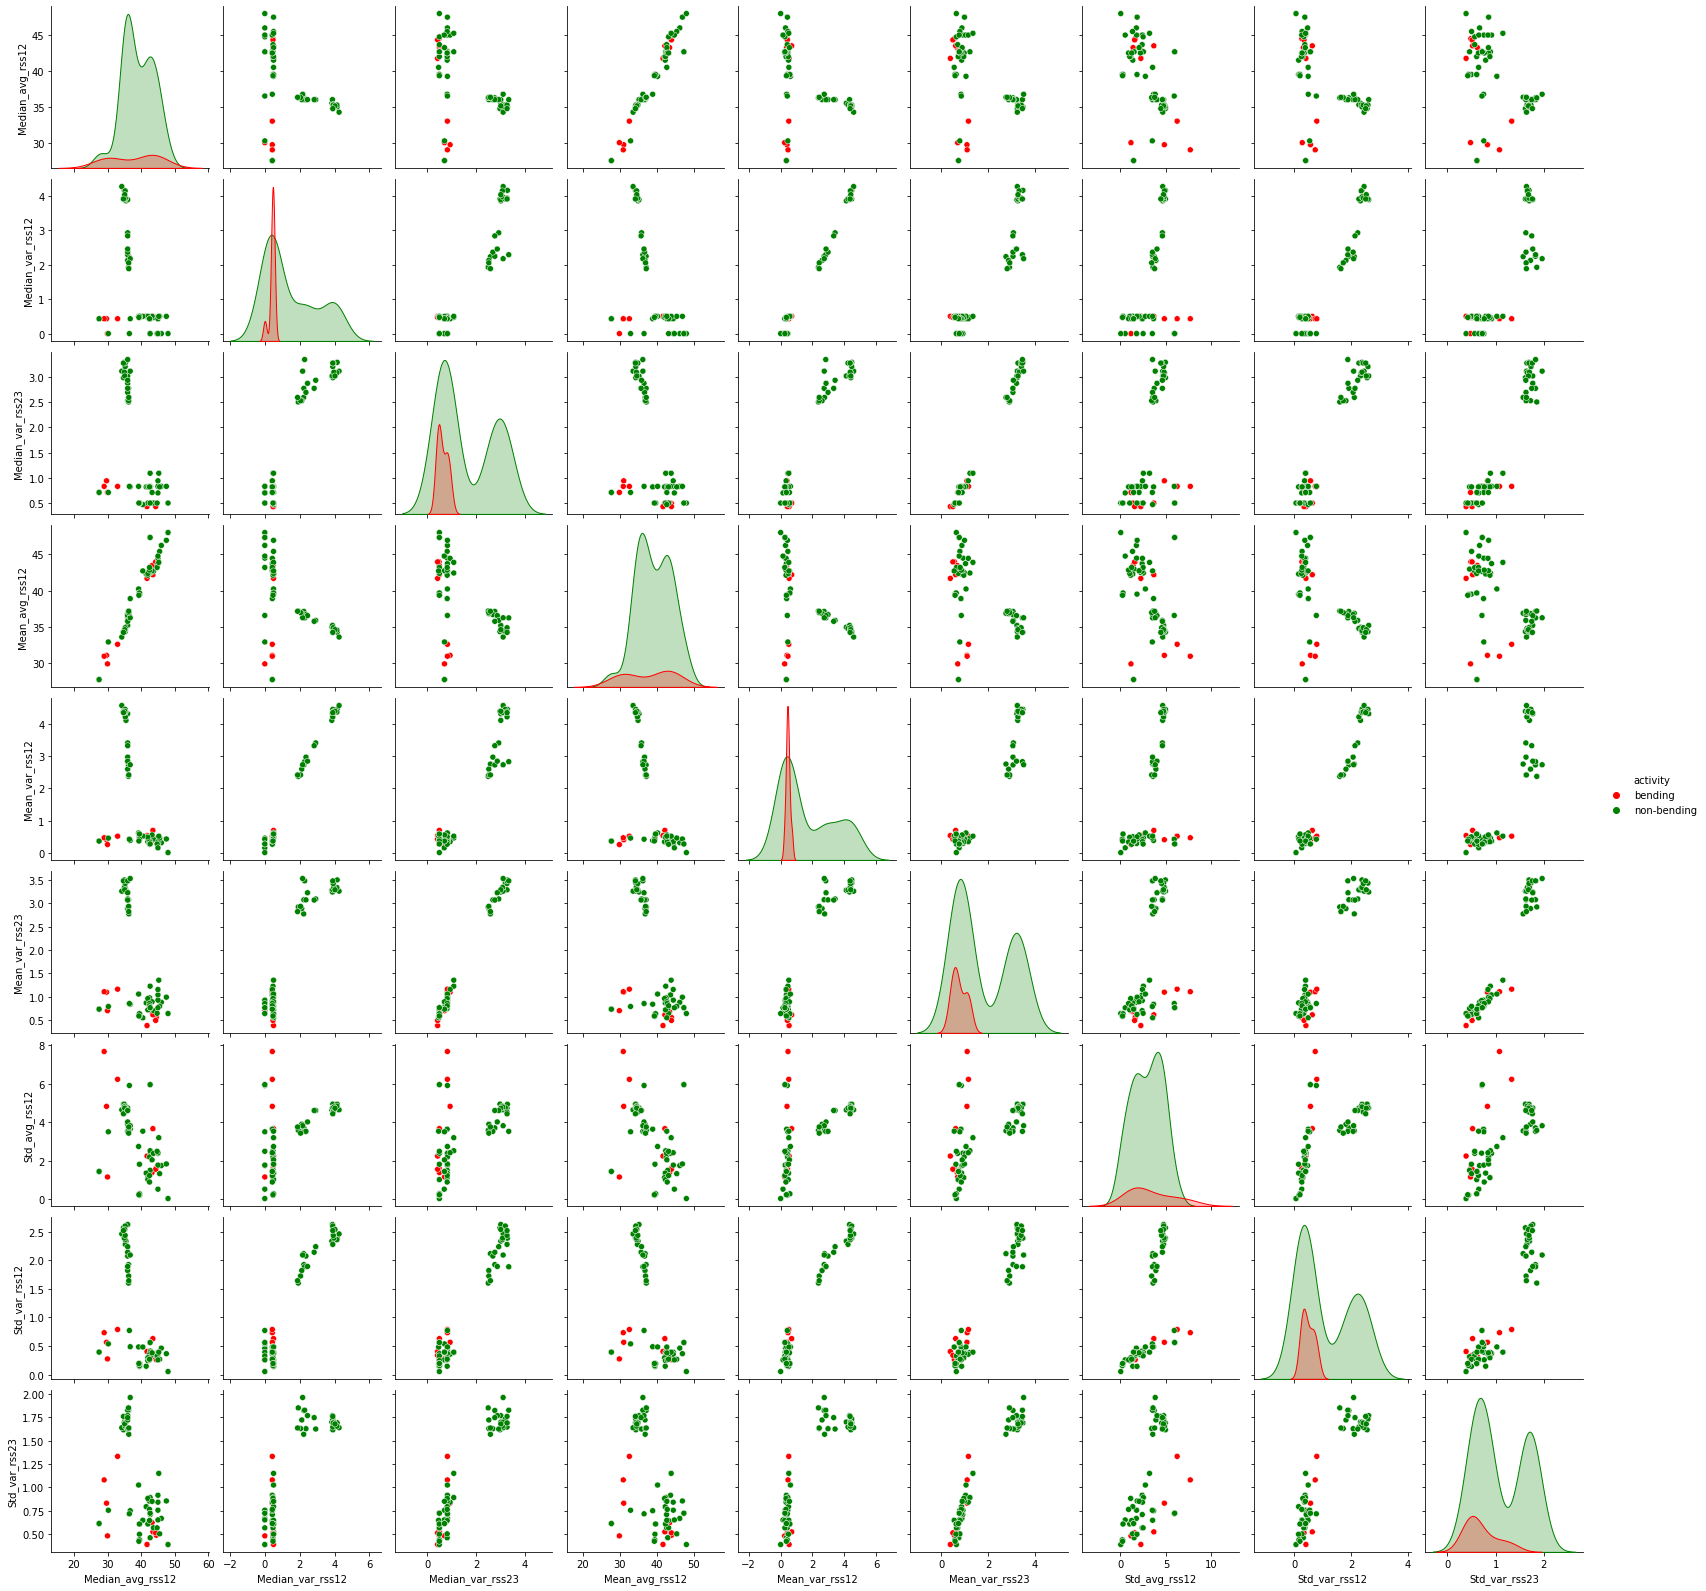

In [13]:
features_to_select = [1,2,6]
parameters = ['Median', 'Mean', 'Std']

train_data_temp = []
feature_to_plot = []
for k,v in train_data.items():
    activity = k.split('/')[0]
    stats = getStats(v)
    row = []
    
    for param in parameters:
        feature_stat = stats[param]
        for j in range(0,6):
            if j+1 in features_to_select:
                if len(feature_to_plot) < len(parameters) * len(features_to_select):
                    feature_to_plot.append(param + '_' + columns[j])
                row.append(feature_stat[j])
    
    if activity in ['bending1', 'bending2']:
        row.append('bending')
    
    else:
        row.append('non-bending')

    train_data_temp.append(row)
    
feature_to_plot.append('activity')
train_data_stats = pd.DataFrame(train_data_temp, columns= feature_to_plot)

sea.pairplot(data= train_data_stats, hue= 'activity', palette= {'bending': 'red', 'non-bending': 'green'})    

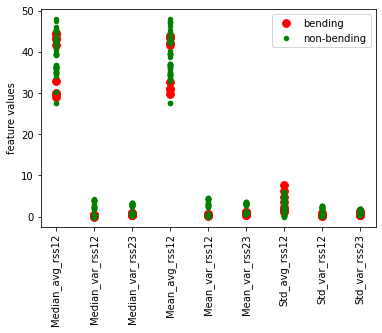

In [14]:
bending_data_temp = []
non_bending_data_temp = []
for i in range(0, len(train_data_stats)):
    for j in range(0, len(feature_to_plot)-1):
        param = feature_to_plot[j]
        temp = []
        
        temp.append(param)
        temp.append(train_data_stats[param][i])
        
        activity = train_data_stats['activity'][i]
        if activity == 'bending':
            bending_data_temp.append(temp[:])
        else:
            non_bending_data_temp.append(temp[:])

bending_data = pd.DataFrame(bending_data_temp, columns=['feature_name', 'feature_vals'])
non_bending_data = pd.DataFrame(non_bending_data_temp, columns=['feature_name', 'feature_vals'])


plt.scatter(bending_data['feature_name'], bending_data['feature_vals'], c='red', label='bending', s=60)
plt.scatter(non_bending_data['feature_name'], non_bending_data['feature_vals'], c='green', label='non-bending', s=20)
plt.xticks(feature_to_plot[:-1], rotation='vertical')
plt.ylabel('feature values')
plt.legend()
plt.show()

**4. (a) (ii). Break each time series in your training set into two (approximately) equal length time series. Now instead of 6 time series for each of the training instances, you have 12 time series for each training instance. Repeat the experiment in 4(a)i, i.e depict scatter plots of the features extracted from both parts of the time series 1,2, and 6. Do you see any considerable difference in the results with those of 4(a)i**

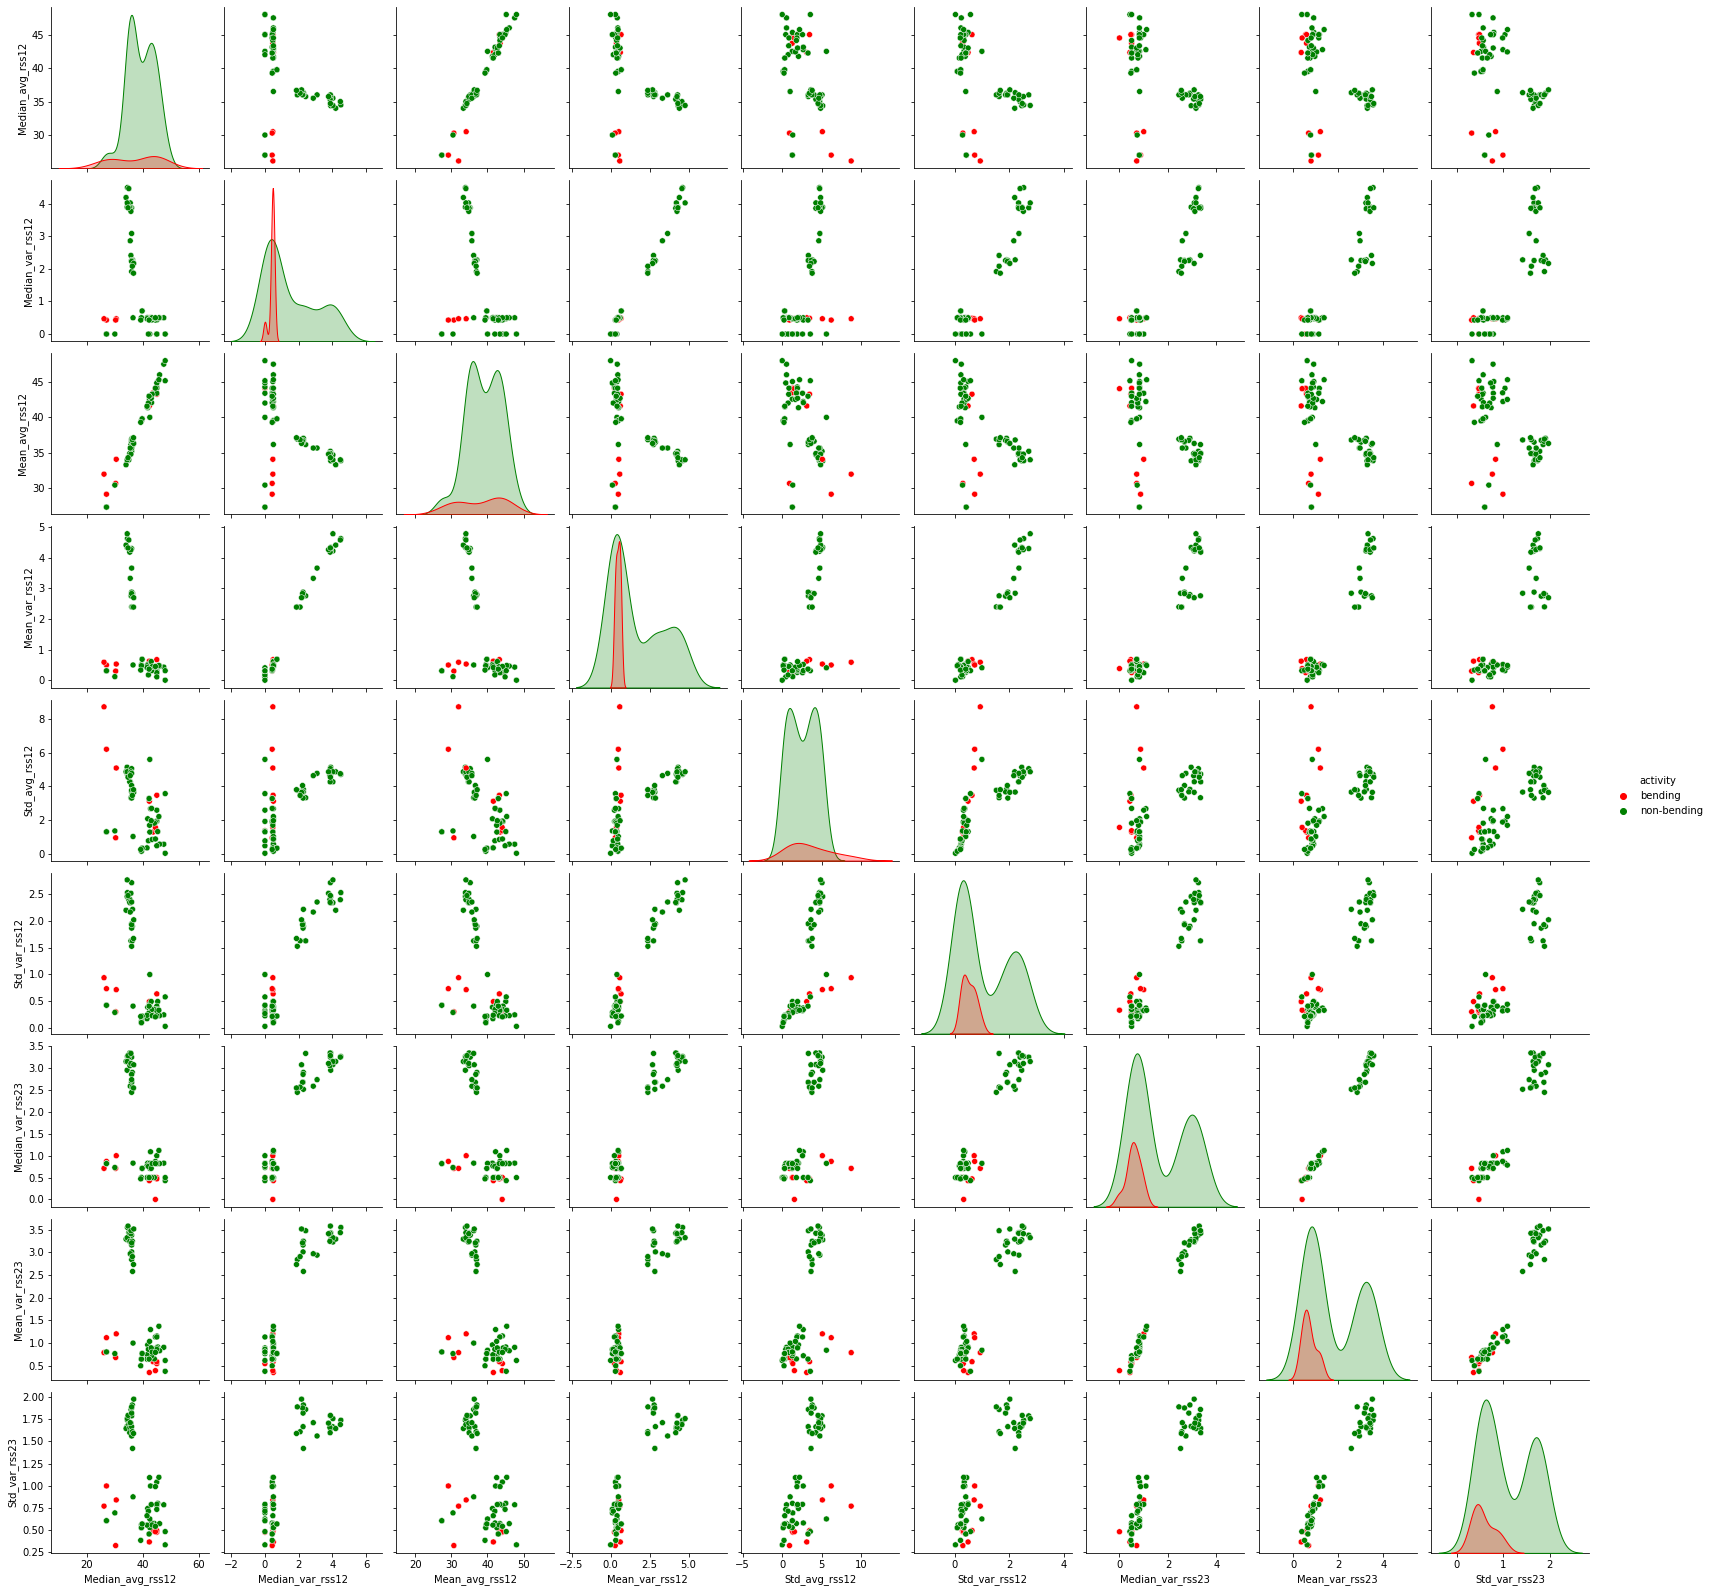

In [15]:
features_to_select = [1,2,12]
parameters = ['Median', 'Mean', 'Std']

train_data_temp = []
feature_to_plot = []
for k,v in train_data.items():
    activity = k.split('/')[0]
    count = 0
    splits = np.array_split(v,2)
    row = []
    for split in splits:
        stats = getStats(split)
        for param in parameters:
            feature_stat = stats[param]
            for j in range(0,6):
                if j+1+count in features_to_select:
                    if len(feature_to_plot) < len(parameters) * len(features_to_select):
                        feature_to_plot.append(param + '_' + columns[j])
                    row.append(feature_stat[j])
        count += 6

    if activity in ['bending1', 'bending2']:
        row.append('bending')

    else:
        row.append('non-bending')

    train_data_temp.append(row)
    
feature_to_plot.append('activity')
train_data_stats_splits = pd.DataFrame(train_data_temp, columns= feature_to_plot)

sea.pairplot(data= train_data_stats_splits, hue= 'activity', palette= {'bending': 'red', 'non-bending': 'green'})    

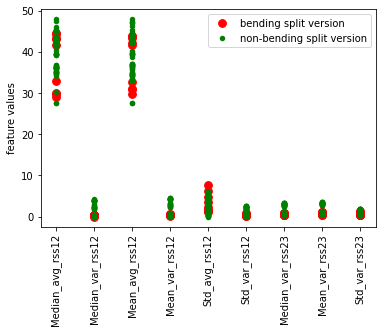

In [16]:
bending_data_temp = []
non_bending_data_temp = []
for i in range(0, len(train_data_stats_splits)):
    for j in range(0, len(feature_to_plot)-1):
        param = feature_to_plot[j]
        temp = []
        
        temp.append(param)
        temp.append(train_data_stats[param][i])
        
        activity = train_data_stats['activity'][i]
        if activity == 'bending':
            bending_data_temp.append(temp[:])
        else:
            non_bending_data_temp.append(temp[:])

bending_data_splits = pd.DataFrame(bending_data_temp, columns=['feature_name', 'feature_vals'])
non_bending_data_splits = pd.DataFrame(non_bending_data_temp, columns=['feature_name', 'feature_vals'])


plt.scatter(bending_data_splits['feature_name'], bending_data_splits['feature_vals'], c='red', label='bending split version', s=60)
plt.scatter(non_bending_data_splits['feature_name'], non_bending_data_splits['feature_vals'], c='green', label='non-bending split version', s=20)
plt.xticks(feature_to_plot[:-1], rotation='vertical')
plt.ylabel('feature values')
plt.legend()
plt.show()

**Do you see any considerable difference in
the results with those of 4(a)i?**

**Yes, when we break a time series into two equal length series, we see that scatter plot of bending vs non-bending classes are more seperable and easy to visualize now.**


**4. (a) (iii). Break each time series in your training set into l ∈ {1,2, . . . ,20} time series of approximately equal length and use logistic regression to solve the binary classification problem, using time-domain features. Remember that breaking each of the time series does not change the number of instances. It only changes the number of features for each instance. Calculate the p-values for your logistic regression parameters in each model corresponding to each value of L and refit a logistic regression model using your pruned set of features.
Alternatively, you can use backward selection using sklearn.feature selection or glm in R. Use 5-fold cross-validation to determine the best value of the pair (L, p), where p is the number of features used in recursive feature elimination. Explain what the right way and the wrong way are to perform cross-validation in this problem.
Obviously, use the right way! Also, you may encounter the problem of class imbalance, which may make some of your folds not having any instances of the rare class. In such a case, you can use stratified cross validation. Research what it means and use it if needed.**

In [17]:
import sys

from beautifultable import BeautifulTable

from sklearn import preprocessing
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.feature_selection import RFECV

from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix, roc_auc_score, auc, roc_curve
from sklearn.feature_selection import chi2

from imblearn.over_sampling import SMOTE

In [18]:
def formatOutputToTable(table_data, table_headers):
    '''
    prints the input data in table format
    '''
    table = BeautifulTable(maxwidth= 100)
    table.column_headers = table_headers
    for i in range(0, len(table_data)):
        table.append_row(table_data[i])
    print(table)
    

In [19]:
def getTrainData(train_data_splits_L, feature_to_plot, train_index):
    '''
    Returns training data for each L
    '''
    train_XY = []
    for index in train_index:
        train_XY.append(train_data_splits_L[feature_to_plot].iloc[index])
        
    train_XY = pd.DataFrame(train_XY)
    train_Y = train_XY['activity']
    train_X = train_XY.drop('activity', axis= 1)
    return train_X, train_Y

In [20]:
def getCrossValData(train_data_splits_L, feature_to_plot, val_index):
    '''
    Returns cross validation data for each L
    '''
    val_XY = []
    for index in val_index:
        val_XY.append(train_data_splits_L[feature_to_plot].iloc[index])
        
    val_XY = pd.DataFrame(val_XY)
    val_Y = val_XY['activity']
    val_X = val_XY.drop('activity', axis= 1)
    return val_X, val_Y

In [21]:
def trainValModel(train_X, train_Y, val_X, val_Y, feature_to_plot):
    '''
    Trains Logsitic Regression model 
    '''
    logistic_reg_model = LogisticRegression(solver= 'liblinear', C= sys.maxsize)
    rfecv_model = RFECV(estimator= logistic_reg_model, cv= StratifiedKFold(5))
    
    rfecv_model.fit(train_X, train_Y)
    rank = rfecv_model.ranking_
    top_features = []
        
    for i in range(len(rank)):
        if rank[i] == 1:
            top_features.append(feature_to_plot[i])
    
    new_train_X = train_X.loc[:, top_features] 
    new_val_X = val_X.loc[:, top_features]
        
    # retrain with top features only
    new_logistic_reg_model = LogisticRegression(solver= 'liblinear', C= sys.maxsize)
    new_logistic_reg_model = new_logistic_reg_model.fit(new_train_X, train_Y)
    
    # eval metric on cross validation data
    val_accuracy = new_logistic_reg_model.score(new_val_X, val_Y)
    val_pred_prob = new_logistic_reg_model.predict_proba(new_val_X)[::,1]
    val_AUC = roc_auc_score(val_Y, val_pred_prob)
    
    return val_accuracy, val_AUC, top_features

In [22]:
features_to_select = [1,2,3,4,5,6]
parameters = ['Median', 'Mean', 'Std']
start_L = 1
end_L = 20

overall_top_features = {}
L_train_data = {}

logistic_reg_L_data = []

for L in range(start_L, end_L+1):
    train_data_temp = []
    feature_to_plot = []
    
    for k,v in train_data.items():
        activity = k.split('/')[0]
        count = 1
        splits = np.array_split(v,L)
        row = []
        for split in splits:
            stats = getStats(split)
            for param in parameters:
                feature_stat = stats[param]
                for j in range(0,6):
                    if len(feature_to_plot) < len(parameters) * len(features_to_select) * L:
                        feature_to_plot.append(param + '_' + columns[j] + '_split_' + str(count))
                    row.append(feature_stat[j])
            count += 1
        # Encoding bending data's as label 1
        # and other data as label 0
        if activity in ['bending1', 'bending2']:
            row.append(1)
        else:
            row.append(0)

        train_data_temp.append(row)
    
    feature_to_plot.append('activity')
    train_data_splits_L = pd.DataFrame(train_data_temp, columns= feature_to_plot)

    AUC = []
    k_fold_top_features = []
    accuracy = []
    
    strat_K_fold = StratifiedKFold(n_splits= 5, shuffle= False)
    
    for train_index, val_index in strat_K_fold.split(train_data_splits_L[feature_to_plot], train_data_splits_L['activity']):
        # get train data for model
        train_X, train_Y = getTrainData(train_data_splits_L, feature_to_plot, train_index)
        
        # get cross validation data for model
        val_X, val_Y = getCrossValData(train_data_splits_L, feature_to_plot, val_index)
        
        # finds best features and train on those features
        val_accuracy, val_AUC, top_features = trainValModel(train_X, train_Y, val_X, val_Y, feature_to_plot)
        
        accuracy.append(val_accuracy)
        AUC.append(val_AUC)
        k_fold_top_features.append(top_features)
    
    temp = []
    temp.append(L)
    temp.append(np.mean(AUC))
    temp.append(np.mean(accuracy))
    
    k_fold_index = np.argmax(AUC)
    
    overall_top_features[L] = k_fold_top_features[k_fold_index]
    L_train_data[L] = train_data_splits_L
    
    logistic_reg_L_data.append(temp)


In [23]:
output = pd.DataFrame(logistic_reg_L_data, columns= ['L','Train Avg AUC', 'Train Accuracy'])
output

,L,Train Avg AUC,Train Accuracy
0,1,0.916667,0.857143
1,2,0.950000,0.898901
2,3,0.991667,0.914286
3,4,0.908333,0.928571
4,5,0.933333,0.900000
5,6,0.875000,0.900000
6,7,0.933333,0.869231
7,8,1.000000,0.914286
8,9,0.950000,0.942857
9,10,0.975000,0.942857


In [24]:
AUCS = output.iloc[:,1]
best_index = AUCS.argmax()

best_L = output.iloc[best_index,0]
best_Avg_AUC = output.iloc[best_index, 1]

print('******************')
print('BEST L BASED ON AUC: ', best_L)
print('******************')

print('BEST FEATURES: ')

best_features_for_best_L = pd.DataFrame(overall_top_features[best_L], columns=['feature name'])
best_features_for_best_L

******************
BEST L BASED ON AUC:  8
******************
BEST FEATURES: 


,feature name
0,Median_avg_rss23_split_1
1,Mean_avg_rss23_split_1
2,Mean_avg_rss23_split_2
3,Median_avg_rss13_split_3
4,Median_avg_rss23_split_3
5,Mean_avg_rss23_split_3
6,Median_avg_rss12_split_5
7,Mean_avg_rss12_split_6


**To find best (L, p) pair, I have used Avg AUC as the metric over accuracy due to imbalanced classes.**

**4. (a)(iv). Report the confusion matrix and show the ROC and AUC for your classifier on train data. Report the parameters of your logistic regression β i’s as well as the p-values associated with them**

In [25]:
def printConfusionMatrix(tn, fp, fn, tp):
    conf_data = []
    
    temp1 = []
    temp1.append('')
    temp1.append('Predicted Bending')
    temp1.append('Predicted Non-Bending')
    conf_data.append(temp1)
    
    temp2 = []
    temp2.append('GT Bending')
    temp2.append(tp)
    temp2.append(fn)
    conf_data.append(temp2)
    
    temp3 = []
    temp3.append('GT Non-Bending')
    temp3.append(fp)
    temp3.append(tn)
    conf_data.append(temp3)
    
    formatOutputToTable(conf_data, [])

In [26]:
# re-training LR on best (L,p) pair
req_features = best_features_for_best_L.values.tolist()
req_features = [ele[0] for ele in req_features]

new_train_X = L_train_data[best_L][req_features]
new_train_Y = L_train_data[best_L]['activity']

new_logistic_reg_model = LogisticRegression(solver= 'liblinear', C= sys.maxsize)
new_logistic_reg_model = new_logistic_reg_model.fit(new_train_X, new_train_Y)

# parameters/ coefficents
coeffs = new_logistic_reg_model.coef_[0]

# P-values are: 
_, p_values = chi2(new_train_X, new_train_Y)


output_data_LR = []
for i in range(len(req_features)):
    temp = []
    temp.append(req_features[i])
    temp.append(coeffs[i])
    temp.append(p_values[i])
    output_data_LR.append(temp)

formatOutputToTable(output_data_LR, ["feature name", "coeff", "p-value"])

+--------------------------+--------+---------+
|       feature name       | coeff  | p-value |
+--------------------------+--------+---------+
| Median_avg_rss23_split_1 | 0.545  |   0.0   |
+--------------------------+--------+---------+
|  Mean_avg_rss23_split_1  | 1.855  |   0.0   |
+--------------------------+--------+---------+
|  Mean_avg_rss23_split_2  | 2.809  |   0.0   |
+--------------------------+--------+---------+
| Median_avg_rss13_split_3 | -1.812 |  0.154  |
+--------------------------+--------+---------+
| Median_avg_rss23_split_3 |  0.56  |   0.0   |
+--------------------------+--------+---------+
|  Mean_avg_rss23_split_3  | 1.044  |   0.0   |
+--------------------------+--------+---------+
| Median_avg_rss12_split_5 | -1.165 |  0.175  |
+--------------------------+--------+---------+
|  Mean_avg_rss12_split_6  | -1.613 |  0.28   |
+--------------------------+--------+---------+


/Users/prince/opt/anaconda3/envs/realize/lib/python3.8/site-packages/beautifultable/utils.py:125: FutureWarning: 'BeautifulTable.column_headers' has been deprecated in 'v1.0.0' and will be removed in 'v1.2.0'. Use 'BTColumnCollection.header' instead.
  warnings.warn(message, FutureWarning)
/Users/prince/opt/anaconda3/envs/realize/lib/python3.8/site-packages/beautifultable/utils.py:125: FutureWarning: 'BeautifulTable.append_row' has been deprecated in 'v1.0.0' and will be removed in 'v1.2.0'. Use 'BTRowCollection.append' instead.
  warnings.warn(message, FutureWarning)


Training Confusion matrix: 
+----------------+-------------------+-----------------------+
|                | Predicted Bending | Predicted Non-Bending |
+----------------+-------------------+-----------------------+
|   GT Bending   |         9         |           0           |
+----------------+-------------------+-----------------------+
| GT Non-Bending |         0         |          60           |
+----------------+-------------------+-----------------------+
Training Accuracy:  1.0
Train AUC:  1.0
Train ROC: 


/Users/prince/opt/anaconda3/envs/realize/lib/python3.8/site-packages/beautifultable/utils.py:125: FutureWarning: 'BeautifulTable.column_headers' has been deprecated in 'v1.0.0' and will be removed in 'v1.2.0'. Use 'BTColumnCollection.header' instead.
  warnings.warn(message, FutureWarning)
/Users/prince/opt/anaconda3/envs/realize/lib/python3.8/site-packages/beautifultable/utils.py:125: FutureWarning: 'BeautifulTable.append_row' has been deprecated in 'v1.0.0' and will be removed in 'v1.2.0'. Use 'BTRowCollection.append' instead.
  warnings.warn(message, FutureWarning)


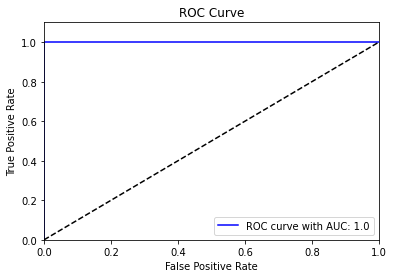

In [27]:
# all metrics evaluated on training data
pred_Y = new_logistic_reg_model.predict(new_train_X)
print("Training Confusion matrix: ")
tn_LR, fp_LR, fn_LR, tp_LR = confusion_matrix(new_train_Y, pred_Y).ravel()
printConfusionMatrix(tn_LR, fp_LR, fn_LR, tp_LR)


train_acc_LR = new_logistic_reg_model.score(new_train_X, new_train_Y)
print("Training Accuracy: ", train_acc_LR)


pred_Y_prob = new_logistic_reg_model.predict_proba(new_train_X)[::,1]
fpr_LR, tpr_LR, _ = roc_curve(new_train_Y,  pred_Y_prob)
train_AUC_LR = roc_auc_score(new_train_Y, pred_Y_prob)
print('Train AUC: ', train_AUC_LR)

print('Train ROC: ')
plt.plot(fpr_LR, tpr_LR, color='blue', label='ROC curve with AUC: ' + str(train_AUC_LR))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.legend()
plt.show()

**4. (a) (v). Test the classifier on the test set. Remember to break the time series in your test set into the same number of time series into which you broke your training set. Remember that the classifier has to be tested using the features extracted from the test set. Compare the accuracy on the test set with the cross-validation accuracy you obtained previously**

In [28]:
features_to_select = [1,2,3,4,5,6]
parameters = ['Median', 'Mean', 'Std']

test_data_temp = []
feature_to_plot = []

for k,v in test_data.items():
    activity = k.split('/')[0]
    count = 1
    splits = np.array_split(v, best_L)
    row = []
    for split in splits:
        stats = getStats(split)
        for param in parameters:
            feature_stat = stats[param]
            for j in range(0,6):
                if len(feature_to_plot) < len(parameters) * len(features_to_select) * best_L:
                    feature_to_plot.append(param + '_' + columns[j] + '_split_' + str(count))
                row.append(feature_stat[j])
        count += 1

    if activity in ['bending1', 'bending2']:
        row.append(1)

    else:
        row.append(0)

    test_data_temp.append(row)
    
feature_to_plot.append('activity')
test_data_splits_L = pd.DataFrame(test_data_temp, columns= feature_to_plot)

new_test_X = test_data_splits_L[req_features]
new_test_Y = test_data_splits_L['activity']

# Accuracy on test data
test_acc_LR = new_logistic_reg_model.score(new_test_X, new_test_Y)

# Cross-validation accuracy
val_acc_LR = 0
for i in range(0, len(logistic_reg_L_data)):
    if logistic_reg_L_data[i][0] == best_L:
        val_acc_LR = round(logistic_reg_L_data[i][2], 3)
        break

table_data = []
temp = []
temp.append(best_L)
temp.append(test_acc_LR)
temp.append(val_acc_LR)
table_data.append(temp)

formatOutputToTable(table_data, ['Best L', 'Testing Accuracy', 'Cross Validation Accuracy'])

+--------+------------------+---------------------------+
| Best L | Testing Accuracy | Cross Validation Accuracy |
+--------+------------------+---------------------------+
|   8    |      0.947       |           0.914           |
+--------+------------------+---------------------------+


/Users/prince/opt/anaconda3/envs/realize/lib/python3.8/site-packages/beautifultable/utils.py:125: FutureWarning: 'BeautifulTable.column_headers' has been deprecated in 'v1.0.0' and will be removed in 'v1.2.0'. Use 'BTColumnCollection.header' instead.
  warnings.warn(message, FutureWarning)
/Users/prince/opt/anaconda3/envs/realize/lib/python3.8/site-packages/beautifultable/utils.py:125: FutureWarning: 'BeautifulTable.append_row' has been deprecated in 'v1.0.0' and will be removed in 'v1.2.0'. Use 'BTRowCollection.append' instead.
  warnings.warn(message, FutureWarning)


**The model is performing well on test data since testing accuracy is 94.7 %**

**4. (a) (vi).Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters**

Clearly classes are not well seperated, but are imbalanced so when we use K fold cross validation, there may be some folds which could have imbalanced data. So we chose stratified-K fold cross validation here to take care of class imbalances within folds. Also, using stratified-K fold the instablity in calculating the parameters of Logistic regression is less.

**4. (a) (vii). From the confusion matrices you obtained, do you see imbalanced classes? If yes, build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model.**

Testing Confusion matrix: 
+----------------+-------------------+-----------------------+
|                | Predicted Bending | Predicted Non-Bending |
+----------------+-------------------+-----------------------+
|   GT Bending   |         4         |           0           |
+----------------+-------------------+-----------------------+
| GT Non-Bending |         1         |          14           |
+----------------+-------------------+-----------------------+
Test AUC:  1.0
Test ROC: 


/Users/prince/opt/anaconda3/envs/realize/lib/python3.8/site-packages/beautifultable/utils.py:125: FutureWarning: 'BeautifulTable.column_headers' has been deprecated in 'v1.0.0' and will be removed in 'v1.2.0'. Use 'BTColumnCollection.header' instead.
  warnings.warn(message, FutureWarning)
/Users/prince/opt/anaconda3/envs/realize/lib/python3.8/site-packages/beautifultable/utils.py:125: FutureWarning: 'BeautifulTable.append_row' has been deprecated in 'v1.0.0' and will be removed in 'v1.2.0'. Use 'BTRowCollection.append' instead.
  warnings.warn(message, FutureWarning)


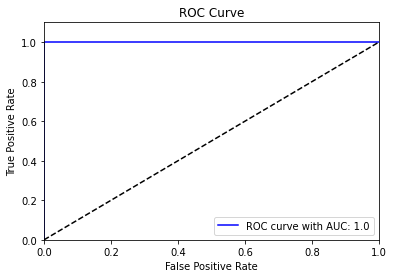

In [29]:
# all metrics evaluated on test data
pred_Y = new_logistic_reg_model.predict(new_test_X)
print("Testing Confusion matrix: ")
tn_LR, fp_LR, fn_LR, tp_LR = confusion_matrix(new_test_Y, pred_Y).ravel()
printConfusionMatrix(tn_LR, fp_LR, fn_LR, tp_LR)

pred_Y_prob = new_logistic_reg_model.predict_proba(new_test_X)[::,1]
fpr_LR, tpr_LR, _ = roc_curve(new_test_Y,  pred_Y_prob)
test_AUC_LR = roc_auc_score(new_test_Y, pred_Y_prob)
print('Test AUC: ', test_AUC_LR)

print('Test ROC: ')
plt.plot(fpr_LR, tpr_LR, color='blue', label='ROC curve with AUC: ' + str(test_AUC_LR))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.legend()
plt.show()

**Yes, clearly there is imbalance in the test data where positive class(bending) has only 4 samples compared to negative class. Thus we are going to use case control sampling**

In [30]:
new_train_X = L_train_data[best_L][req_features]
new_train_Y = L_train_data[best_L]['activity']

count_bending = 0
count_non_bending = 0
for i in range(len(new_train_Y)):
    if new_train_Y[i] == 0:
        count_non_bending += 1
    else:
        count_bending += 1 
print('***************************')
print('Before SMOTE, number of bending samples:', count_bending)
print('Before SMOTE, number of non-bending samples:', count_non_bending)
print('***************************')

smote = SMOTE(sampling_strategy= 'all')
sampled_train_X, sampled_train_Y = smote.fit_resample(new_train_X, new_train_Y.ravel())

sampled_count_bending = 0
sampled_count_non_bending = 0
for i in range(len(sampled_train_Y)):
    if sampled_train_Y[i] == 0:
        sampled_count_non_bending += 1
    else:
        sampled_count_bending += 1 

print('***************************')
print('After SMOTE, number of bending samples:', sampled_count_bending)
print('After SMOTE, number of non-bending samples:', sampled_count_non_bending)
print('***************************')



***************************
Before SMOTE, number of bending samples: 9
Before SMOTE, number of non-bending samples: 60
***************************
***************************
After SMOTE, number of bending samples: 60
After SMOTE, number of non-bending samples: 60
***************************


/Users/prince/opt/anaconda3/envs/realize/lib/python3.8/site-packages/beautifultable/utils.py:125: FutureWarning: 'BeautifulTable.column_headers' has been deprecated in 'v1.0.0' and will be removed in 'v1.2.0'. Use 'BTColumnCollection.header' instead.
  warnings.warn(message, FutureWarning)
/Users/prince/opt/anaconda3/envs/realize/lib/python3.8/site-packages/beautifultable/utils.py:125: FutureWarning: 'BeautifulTable.append_row' has been deprecated in 'v1.0.0' and will be removed in 'v1.2.0'. Use 'BTRowCollection.append' instead.
  warnings.warn(message, FutureWarning)


SMOTE Training Accuracy:  1.0
SMOTE Training Confusion matrix: 
+----------------+-------------------+-----------------------+
|                | Predicted Bending | Predicted Non-Bending |
+----------------+-------------------+-----------------------+
|   GT Bending   |        60         |           0           |
+----------------+-------------------+-----------------------+
| GT Non-Bending |         0         |          60           |
+----------------+-------------------+-----------------------+
SMOTE Train AUC:  1.0
SMOTE Train ROC: 


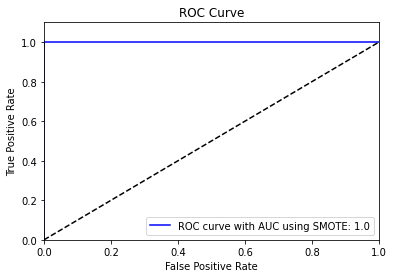

In [31]:
# all metrics evaluated on training data using SMOTE
balanced_LR_model = LogisticRegression(solver= 'liblinear', C= sys.maxsize)
balanced_LR_model = balanced_LR_model.fit(sampled_train_X, sampled_train_Y)

train_acc_balanced_LR = balanced_LR_model.score(sampled_train_X, sampled_train_Y)
print("SMOTE Training Accuracy: ", train_acc_balanced_LR)

pred_Y = balanced_LR_model.predict(sampled_train_X)
tn_BLR, fp_BLR, fn_BLR, tp_BLR = confusion_matrix(sampled_train_Y, pred_Y).ravel()
print("SMOTE Training Confusion matrix: ")
printConfusionMatrix(tn_BLR, fp_BLR, fn_BLR, tp_BLR)

pred_Y_prob = balanced_LR_model.predict_proba(sampled_train_X)[::,1]
fpr_BLR, tpr_BLR, _ = roc_curve(sampled_train_Y,  pred_Y_prob)
train_AUC_BLR = roc_auc_score(sampled_train_Y, pred_Y_prob)
print('SMOTE Train AUC: ', train_AUC_BLR)

print('SMOTE Train ROC: ')
plt.plot(fpr_BLR, tpr_BLR, color='blue', label='ROC curve with AUC using SMOTE: ' + str(train_AUC_BLR))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.legend()
plt.show()

SMOTE Test Accuracy:  0.9473684210526315
SMOTE Test Confusion matrix: 
+----------------+-------------------+-----------------------+
|                | Predicted Bending | Predicted Non-Bending |
+----------------+-------------------+-----------------------+
|   GT Bending   |         4         |           0           |
+----------------+-------------------+-----------------------+
| GT Non-Bending |         1         |          14           |
+----------------+-------------------+-----------------------+
SMOTE Test AUC:  1.0
SMOTE Test ROC: 


/Users/prince/opt/anaconda3/envs/realize/lib/python3.8/site-packages/beautifultable/utils.py:125: FutureWarning: 'BeautifulTable.column_headers' has been deprecated in 'v1.0.0' and will be removed in 'v1.2.0'. Use 'BTColumnCollection.header' instead.
  warnings.warn(message, FutureWarning)
/Users/prince/opt/anaconda3/envs/realize/lib/python3.8/site-packages/beautifultable/utils.py:125: FutureWarning: 'BeautifulTable.append_row' has been deprecated in 'v1.0.0' and will be removed in 'v1.2.0'. Use 'BTRowCollection.append' instead.
  warnings.warn(message, FutureWarning)


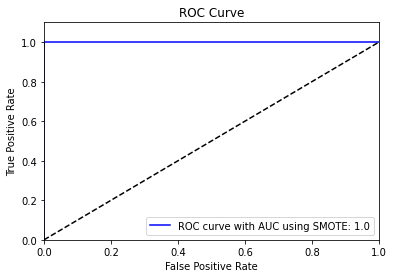

In [32]:
# all metrics evaluated on test data

test_acc_BLR = balanced_LR_model.score(new_test_X, new_test_Y)
print('SMOTE Test Accuracy: ', test_acc_BLR)

pred_test_Y = balanced_LR_model.predict(new_test_X)
print("SMOTE Test Confusion matrix: ")
tn_BLR, fp_BLR, fn_BLR, tp_BLR = confusion_matrix(new_test_Y, pred_test_Y).ravel()
printConfusionMatrix(tn_BLR, fp_BLR, fn_BLR, tp_BLR)

pred_Y_test_prob = balanced_LR_model.predict_proba(new_test_X)[::,1]
fpr_BLR, tpr_BLR, _ = roc_curve(new_test_Y,  pred_Y_test_prob)
test_AUC_BLR = roc_auc_score(new_test_Y, pred_Y_test_prob)
print('SMOTE Test AUC: ', test_AUC_BLR)

print('SMOTE Test ROC: ')
plt.plot(fpr_BLR, tpr_BLR, color='blue', label='ROC curve with AUC using SMOTE: ' + str(test_AUC_BLR))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.legend()
plt.show()

**4. (b)Binary Classification Using L1-penalized logistic regression**

**4. (b) (i). Repeat 4(a)iii using L1-penalized logistic regression, i.e. instead of using p-values for variable selection, use L1 regularization. Note that in this problem, you have to cross-validate for both L, the number of time series into which you break each of your instances, and λ, the weight of L1 penalty in your logistic regression objective function (or C, the budget). Packages usually perform cross-validation for λ automatically.**


In [33]:
def L1PenalizedTrainValModel(train_X, train_Y, val_X, val_Y):
    '''
    Trains Logsitic Regression model 
    '''
    L1_LR_model = LogisticRegressionCV(cv= 5, solver= 'liblinear', penalty= 'l1', max_iter= 1000)
    
    L1_LR_model = L1_LR_model.fit(train_X, train_Y)
    penalty = L1_LR_model.C_[0]
    lambda_val = 1 / penalty
    
    # eval metric on cross validation data
    L1_val_accuracy = L1_LR_model.score(val_X, val_Y)
    val_pred_prob = L1_LR_model.predict_proba(val_X)[::,1]
    fpr, tpr, _ = roc_curve(val_Y,  val_pred_prob)
    L1_val_AUC = roc_auc_score(val_Y, val_pred_prob)
    
    return L1_val_accuracy, L1_val_AUC, lambda_val, fpr, tpr

In [34]:
features_to_select = [1,2,3,4,5,6]
parameters = ['Median', 'Mean', 'Std']
start_L = 1
end_L = 20

overall_L1_lambda_L = {}
L1_pen_train_data = {}

LR_L1_data = []

for L in range(start_L, end_L+1):
    L1_train_data_temp = []
    feature_to_plot = []
    
    for k,v in train_data.items():
        activity = k.split('/')[0]
        count = 1
        splits = np.array_split(v,L)
        row = []
        for split in splits:
            stats = getStats(split)
            for param in parameters:
                feature_stat = stats[param]
                for j in range(0,6):
                    if len(feature_to_plot) < len(parameters) * len(features_to_select) * L:
                        feature_to_plot.append(param + '_' + columns[j] + '_split_' + str(count))
                    row.append(feature_stat[j])
            count += 1
        
        # Encoding bending data's as label 1
        # and other data as label 0
        if activity in ['bending1', 'bending2']:
            row.append(1)
        else:
            row.append(0)

        L1_train_data_temp.append(row)
    
    feature_to_plot.append('activity')
    L1_train_data_splits_L = pd.DataFrame(L1_train_data_temp, columns= feature_to_plot)
    
    # normalize data
    norm_init = preprocessing.MinMaxScaler()
    norm_data = norm_init.fit_transform(L1_train_data_splits_L.values)
    L1_train_data_splits_L = pd.DataFrame(norm_data, columns= L1_train_data_splits_L.columns)

    AUC = []
    L1_lambda_L = []
    accuracy = []
    
    strat_K_fold = StratifiedKFold(n_splits= 5, shuffle= False)
    
    for train_index, val_index in strat_K_fold.split(L1_train_data_splits_L[feature_to_plot], L1_train_data_splits_L['activity']):
        # get train data for model
        train_X, train_Y = getTrainData(L1_train_data_splits_L, feature_to_plot, train_index)
        
        # get cross validation data for model
        val_X, val_Y = getCrossValData(L1_train_data_splits_L, feature_to_plot, val_index)
        
        # finds best features and train on those features
        L1_val_accuracy, L1_val_AUC, lambda_val, fpr, tpr = L1PenalizedTrainValModel(train_X,
                                                                                     train_Y,
                                                                                     val_X,
                                                                                     val_Y)
        
        accuracy.append(L1_val_accuracy)
        AUC.append(L1_val_AUC)
        L1_lambda_L.append(lambda_val)
    
    temp = []
    temp.append(L)
    temp.append(np.mean(AUC))
    temp.append(np.mean(accuracy))
    
    k_fold_index = np.argmax(AUC)
    
    overall_L1_lambda_L[L] = L1_lambda_L[k_fold_index]
    L1_pen_train_data[L] = L1_train_data_splits_L
    
    LR_L1_data.append(temp)  


In [35]:
L1_output = pd.DataFrame(LR_L1_data, columns= ['L','Train Avg AUC', 'Train Accuracy'])
L1_output

,L,Train Avg AUC,Train Accuracy
0,1,0.991667,0.942857
1,2,0.900000,0.914286
2,3,0.941667,0.942857
3,4,0.916667,0.942857
4,5,0.816667,0.870330
5,6,0.900000,0.914286
6,7,0.925000,0.928571
7,8,0.925000,0.884615
8,9,0.908333,0.898901
9,10,0.916667,0.900000


In [36]:
AUCS = L1_output.iloc[:,1]
best_index = AUCS.argmax()

L1_best_L = L1_output.iloc[best_index,0]
L1_best_Avg_AUC = L1_output.iloc[best_index, 1]

print('******************')
print('L1 PENALISED BEST L BASED ON AUC: ', L1_best_L)
print('******************')

print('BEST LAMBDA: ')
L1_best_lambda = overall_L1_lambda_L[L1_best_L]
print(L1_best_lambda)

******************
L1 PENALISED BEST L BASED ON AUC:  1
******************
BEST LAMBDA: 
0.04641588833612782


L1 Penalised Training Accuracy:  1.0
L1 Penalised Training Confusion matrix: 
+----------------+-------------------+-----------------------+
|                | Predicted Bending | Predicted Non-Bending |
+----------------+-------------------+-----------------------+
|   GT Bending   |         9         |           0           |
+----------------+-------------------+-----------------------+
| GT Non-Bending |         0         |          60           |
+----------------+-------------------+-----------------------+
L1 Penalised Train AUC:  1.0
L1 Penalised Train ROC: 


/Users/prince/opt/anaconda3/envs/realize/lib/python3.8/site-packages/beautifultable/utils.py:125: FutureWarning: 'BeautifulTable.column_headers' has been deprecated in 'v1.0.0' and will be removed in 'v1.2.0'. Use 'BTColumnCollection.header' instead.
  warnings.warn(message, FutureWarning)
/Users/prince/opt/anaconda3/envs/realize/lib/python3.8/site-packages/beautifultable/utils.py:125: FutureWarning: 'BeautifulTable.append_row' has been deprecated in 'v1.0.0' and will be removed in 'v1.2.0'. Use 'BTRowCollection.append' instead.
  warnings.warn(message, FutureWarning)


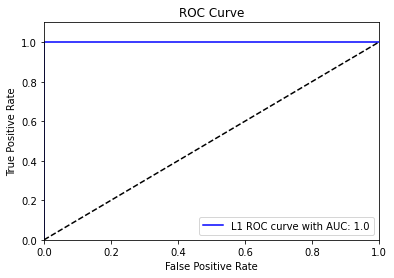

In [37]:
# all metrics evaluated on training data

L1_train_DF = L1_pen_train_data[L1_best_L]

L1_train_Y = pd.DataFrame(L1_train_DF['activity'])
L1_train_X = L1_train_DF.drop('activity', axis= 1)

L1_train_Y = np.array(L1_train_Y).flatten()

L1_best_C_val = 1 / L1_best_lambda
L1_LR_model = LogisticRegression(solver='liblinear', penalty='l1', C= L1_best_C_val)
L1_LR_model = L1_LR_model.fit(L1_train_X, L1_train_Y)

train_acc_L1_LR = L1_LR_model.score(L1_train_X, L1_train_Y)
print("L1 Penalised Training Accuracy: ", train_acc_L1_LR)

pred_Y = L1_LR_model.predict(L1_train_X)
print("L1 Penalised Training Confusion matrix: ")
tn_L1_LR, fp_L1_LR, fn_L1_LR, tp_L1_LR = confusion_matrix(L1_train_Y, pred_Y).ravel()
printConfusionMatrix(tn_L1_LR, fp_L1_LR, fn_L1_LR, tp_L1_LR)

pred_Y_prob = L1_LR_model.predict_proba(L1_train_X)[::,1]
fpr_L1_LR, tpr_L1_LR, _ = roc_curve(L1_train_Y,  pred_Y_prob)
train_AUC_L1_LR = roc_auc_score(L1_train_Y, pred_Y_prob)
print('L1 Penalised Train AUC: ', train_AUC_L1_LR)

print('L1 Penalised Train ROC: ')
plt.plot(fpr_L1_LR, tpr_L1_LR, color='blue', label='L1 ROC curve with AUC: ' + str(train_AUC_L1_LR))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.legend()
plt.show()

In [38]:
features_to_select = [1,2,3,4,5,6]
parameters = ['Median', 'Mean', 'Std']

L1_test_data_temp = []
feature_to_plot = []

for k,v in test_data.items():
    activity = k.split('/')[0]
    count = 1
    splits = np.array_split(v, L1_best_L)
    row = []
    for split in splits:
        stats = getStats(split)
        for param in parameters:
            feature_stat = stats[param]
            for j in range(0,6):
                if len(feature_to_plot) < len(parameters) * len(features_to_select) * L1_best_L:
                    feature_to_plot.append(param + '_' + columns[j] + '_split_' + str(count))
                row.append(feature_stat[j])
        count += 1

    if activity in ['bending1', 'bending2']:
        row.append(1)

    else:
        row.append(0)

    L1_test_data_temp.append(row)
    
feature_to_plot.append('activity')
L1_test_data_splits_L = pd.DataFrame(L1_test_data_temp, columns= feature_to_plot)


L1 Penalised Test Accuracy:  1.0
L1 Penalised Test Confusion matrix: 
+----------------+-------------------+-----------------------+
|                | Predicted Bending | Predicted Non-Bending |
+----------------+-------------------+-----------------------+
|   GT Bending   |         4         |           0           |
+----------------+-------------------+-----------------------+
| GT Non-Bending |         0         |          15           |
+----------------+-------------------+-----------------------+
L1 Penalised Test AUC:  1.0
L1 Penalised Test ROC: 


/Users/prince/opt/anaconda3/envs/realize/lib/python3.8/site-packages/beautifultable/utils.py:125: FutureWarning: 'BeautifulTable.column_headers' has been deprecated in 'v1.0.0' and will be removed in 'v1.2.0'. Use 'BTColumnCollection.header' instead.
  warnings.warn(message, FutureWarning)
/Users/prince/opt/anaconda3/envs/realize/lib/python3.8/site-packages/beautifultable/utils.py:125: FutureWarning: 'BeautifulTable.append_row' has been deprecated in 'v1.0.0' and will be removed in 'v1.2.0'. Use 'BTRowCollection.append' instead.
  warnings.warn(message, FutureWarning)


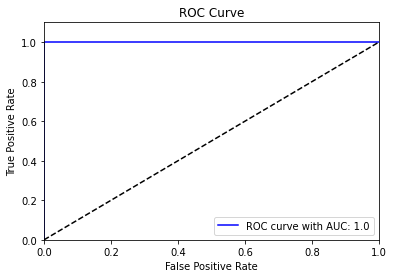

In [39]:
# all metrics evaluated on test data
# normalize data

norm_test_init = preprocessing.MinMaxScaler()
norm_data = norm_test_init.fit_transform(L1_test_data_splits_L.values)
L1_test_data_splits_L = pd.DataFrame(norm_data, columns= L1_test_data_splits_L.columns)


L1_test_Y = L1_test_data_splits_L['activity']
L1_test_X = L1_test_data_splits_L.drop('activity', axis= 1)

# Accuracy on test data
test_acc_L1_LR = L1_LR_model.score(L1_test_X, L1_test_Y)
print("L1 Penalised Test Accuracy: ", test_acc_L1_LR)

L1_pred_Y = L1_LR_model.predict(L1_test_X)
print("L1 Penalised Test Confusion matrix: ")
tn_L1_LR, fp_L1_LR, fn_L1_LR, tp_L1_LR = confusion_matrix(L1_test_Y, L1_pred_Y).ravel()
printConfusionMatrix(tn_L1_LR, fp_L1_LR, fn_L1_LR, tp_L1_LR)

pred_Y_prob = L1_LR_model.predict_proba(L1_test_X)[::,1]
fpr_L1_LR, tpr_L1_LR, _ = roc_curve(L1_test_Y,  pred_Y_prob)
test_AUC_L1_LR = roc_auc_score(L1_test_Y, pred_Y_prob)
print('L1 Penalised Test AUC: ', test_AUC_L1_LR)

print('L1 Penalised Test ROC: ')
plt.plot(fpr_L1_LR, tpr_L1_LR, color='blue', label='ROC curve with AUC: ' + str(test_AUC_L1_LR))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.legend()
plt.show()


**4. (b)(ii).Compare the L1-penalized with variable selection using p-values. Which one performs better? Which one is easier to implement?**

In [40]:
compare_models = []

temp1 = []
temp1.append('Train Accuracy')
temp1.append(train_acc_LR)
temp1.append(train_acc_L1_LR)
compare_models.append(temp1)

temp2 = []
temp2.append('Train AUC')
temp2.append(train_AUC_LR)
temp2.append(train_AUC_L1_LR)
compare_models.append(temp2)

temp3 = []
temp3.append('Test Accuracy')
temp3.append(test_acc_LR)
temp3.append(test_acc_L1_LR)
compare_models.append(temp3)

temp4 = []
temp4.append('Test AUC')
temp4.append(test_AUC_LR)
temp4.append(test_AUC_L1_LR)
compare_models.append(temp4)


formatOutputToTable(compare_models, ['Eval Parameter', 'Logistic Regression with RFE', 'L1 Penalised Logistic Regression'])


+----------------+------------------------------+----------------------------------+
| Eval Parameter | Logistic Regression with RFE | L1 Penalised Logistic Regression |
+----------------+------------------------------+----------------------------------+
| Train Accuracy |             1.0              |               1.0                |
+----------------+------------------------------+----------------------------------+
|   Train AUC    |             1.0              |               1.0                |
+----------------+------------------------------+----------------------------------+
| Test Accuracy  |            0.947             |               1.0                |
+----------------+------------------------------+----------------------------------+
|    Test AUC    |             1.0              |               1.0                |
+----------------+------------------------------+----------------------------------+


/Users/prince/opt/anaconda3/envs/realize/lib/python3.8/site-packages/beautifultable/utils.py:125: FutureWarning: 'BeautifulTable.column_headers' has been deprecated in 'v1.0.0' and will be removed in 'v1.2.0'. Use 'BTColumnCollection.header' instead.
  warnings.warn(message, FutureWarning)
/Users/prince/opt/anaconda3/envs/realize/lib/python3.8/site-packages/beautifultable/utils.py:125: FutureWarning: 'BeautifulTable.append_row' has been deprecated in 'v1.0.0' and will be removed in 'v1.2.0'. Use 'BTRowCollection.append' instead.
  warnings.warn(message, FutureWarning)


**From above table we can clearly see that, L1 Penalised Logistic Regression model performs better than Logistic Regression with variable on this dataset, since its test accuracy increases while other eval parameters remain constant. Also, by adding just one regularization parameter to LR we can make it L1 LR, so its easier to implement as compared to LR with RFE. The test accuracy for L1 penalized LR is better than LR with variable selection.**

**4.(c) Multi-class Classification (The Realistic Case)**

**4.(c)(i)Find the best l in the same way as you found it in 4(b)i to build an L1-penalized multinomial regression model to classify all activities in your training set. Report your test error. Research how confusion matrices and ROC
curves are defined for multiclass classification and show them for this problem if possible.**

In [41]:
import warnings
warnings.filterwarnings('ignore')

In [42]:
features_to_select = [1,2,3,4,5,6]
parameters = ['Median', 'Mean', 'Std']
start_L = 1
end_L = 20

multi_L1_penalty = {}
multi_L1_pen_train_data = {}

multi_L1_data = []

for L in range(start_L, end_L+1):
    multi_L1_pen_train_data_temp = []
    feature_to_plot = []
    
    for k,v in train_data.items():
        activity = k.split('/')[0]
        count = 1
        splits = np.array_split(v,L)
        row = []
        for split in splits:
            stats = getStats(split)
            for param in parameters:
                feature_stat = stats[param]
                for j in range(0,6):
                    if len(feature_to_plot) < len(parameters) * len(features_to_select) * L:
                        feature_to_plot.append(param + '_' + columns[j] + '_split_' + str(count))
                    row.append(feature_stat[j])
            count += 1
        
        index = dir_names.index(activity)
        row.append(index)

        multi_L1_pen_train_data_temp.append(row)
    
    feature_to_plot.append('activity')
    multi_L1_train_data = pd.DataFrame(multi_L1_pen_train_data_temp, columns= feature_to_plot)
    
    # normalize data
    norm1 = preprocessing.MinMaxScaler()
    norm = norm1.fit_transform(multi_L1_train_data[feature_to_plot[:-1]].values)
    normalizedDF = pd.DataFrame(norm, columns= feature_to_plot[:-1])
    multi_L1_train_data = normalizedDF.join(multi_L1_train_data['activity'])

    L1_penalty = []
    accuracy = []
    
    strat_K_fold = StratifiedKFold(n_splits= 5, shuffle= False)
    
    for train_index, val_index in strat_K_fold.split(multi_L1_train_data[feature_to_plot],
                                                     multi_L1_train_data['activity']):
        # get train data for model
        train_X, train_Y = getTrainData(multi_L1_train_data, feature_to_plot, train_index)
        
        # get cross validation data for model
        val_X, val_Y = getCrossValData(multi_L1_train_data, feature_to_plot, val_index)
        
        # Fit multiclass regularized logistic regression
        multi_L1_LR_model = LogisticRegressionCV(cv= 5, 
                                                 solver= 'liblinear', 
                                                 penalty= 'l1', 
                                                 max_iter= 1000,
                                                 multi_class= 'auto')
        
        multi_L1_LR_model = multi_L1_LR_model.fit(train_X, train_Y)
        penalties = multi_L1_LR_model.C_
        
        # Cross-validation accuracy
        train_acc_multi_L1_LR = multi_L1_LR_model.score(val_X, val_Y)
        
        accuracy.append(train_acc_multi_L1_LR)
        L1_penalty.append(penalties)
        
    temp = []
    temp.append(L)
    temp.append(np.mean(accuracy))
    
    k_fold_index = np.argmax(accuracy)
    
    multi_L1_penalty[L] = L1_penalty[k_fold_index]
    multi_L1_pen_train_data[L] = multi_L1_train_data
    
    multi_L1_data.append(temp) 

In [43]:
multi_L1_output = pd.DataFrame(multi_L1_data, columns= ['L','Train Accuracy'])
multi_L1_output

,L,Train Accuracy
0,1,0.798901
1,2,0.800000
2,3,0.756044
3,4,0.725275
4,5,0.725275
5,6,0.725275
6,7,0.709890
7,8,0.697802
8,9,0.680220
9,10,0.739560


In [44]:
accs = multi_L1_output.iloc[:,1]
best_index = accs.argmax()

multi_L1_best_L = multi_L1_output.iloc[best_index,0]
multi_L1_best_acc = multi_L1_output.iloc[best_index, 1]

print('******************')
print('BEST L ON MULTICLASS LOGISTIC REGRESSION: ', multi_L1_best_L)
print('******************')

print('BEST LAMBDA ON MULTICLASS LOGISTIC REGRESSION: ')
multi_best_penalities = multi_L1_penalty[multi_L1_best_L]

disp = []
for i in range(len(multi_best_penalities)):
    temp = []
    temp.append(dir_names[i])
    temp.append(round(float(1 / multi_best_penalities[i]), 3))
    disp.append(temp)

formatOutputToTable(disp, ['class', 'lambda'])

print('BEST CROSS-VALIDATION ACCURACY FOR MULTICLASS LOGISTIC REGRESSION: ', multi_L1_best_acc)

******************
BEST L ON MULTICLASS LOGISTIC REGRESSION:  2
******************
BEST LAMBDA ON MULTICLASS LOGISTIC REGRESSION: 
+----------+---------+
|  class   | lambda  |
+----------+---------+
| bending1 |  0.006  |
+----------+---------+
| bending2 | 10000.0 |
+----------+---------+
| cycling  |  0.359  |
+----------+---------+
|  lying   |  0.006  |
+----------+---------+
| sitting  |  0.046  |
+----------+---------+
| standing |  0.046  |
+----------+---------+
| walking  |  0.359  |
+----------+---------+
BEST CROSS-VALIDATION ACCURACY FOR MULTICLASS LOGISTIC REGRESSION:  0.8


In [54]:
def getMultiClassPredictions(multi_models, multi_L1_train_X):
    predictions = []
    pred_prob_df = pd.DataFrame()
    
    # run inference for each model (similar to one vs all classification)
    
    for j in range(len(multi_models)):        
        class_model = multi_models[j]
        pred_prob = class_model.predict_proba(multi_L1_train_X)
        pred_prob_class = []
        
        for i in range(len(pred_prob)):
            pred_prob_class.append(round(pred_prob[i][1], 3))
        
        pred_prob_class_df = pd.DataFrame(pred_prob_class, columns= [dir_names[j]])
        pred_prob_df = pd.concat([pred_prob_df, pred_prob_class_df], axis=1)
        
    for i in range(len(pred_prob_df)):
        maxProb = 0.0
        predClass = ''
        for j in range(len(dir_names)):
            prob = pred_prob_df[dir_names[j]][i]
            if prob > maxProb:
                maxProb = prob
                predClass = dir_names[j]
        predictions.append(dir_names.index(predClass))
    
    return predictions, pred_prob_df

In [63]:
multi_L1_train_XY = multi_L1_pen_train_data[multi_L1_best_L]
multi_L1_train_Y = pd.DataFrame(multi_L1_train_XY['activity'])
multi_L1_train_X = multi_L1_train_XY.drop('activity', axis= 1)
multi_L1_train_Y = np.array(multi_L1_train_Y).flatten()

multi_models = []
for i in range(len(dir_names)):
    class_name = dir_names[i]
    best_C_val = multi_best_penalities[i]
    new_multi_L1_train_Y = []
    
    for j in range(len(multi_L1_train_Y)):
        if multi_L1_train_Y[j] == i:
            new_multi_L1_train_Y.append(1)
        else:
            new_multi_L1_train_Y.append(0)
            
    model_LR_L1 = LogisticRegression(solver= 'liblinear', 
                                     penalty= 'l1', 
                                     C= best_C_val,
                                     multi_class= 'auto')
    
    model_LR_L1 = model_LR_L1.fit(multi_L1_train_X, new_multi_L1_train_Y)
    multi_models.append(model_LR_L1)

    
predictions, pred_prob_df = getMultiClassPredictions(multi_models, multi_L1_train_X) 

count = 0
for i in range(len(multi_L1_train_Y)):
    if predictions[i] == multi_L1_train_Y[i]:
        count += 1

multi_L1_train_acc = round(count / len(multi_L1_train_Y), 3)
print('******************')
print('TRAIN ACCURACY MULTICLASS L1 PENALISED LOGISTIC REGRESSION: ')
print(multi_L1_train_acc)
print('******************')

# for building ROC curves
# print('******************')
# print('TRAIN ROC MULTICLASS L1 PENALISED LOGISTIC REGRESSION: ')
# print('******************')

# visualizer = ROCAUC(multi_models, classes= dir_names)
# visualizer.fit(multi_L1_train_X, multi_L1_train_Y)
# visualizer.score(multi_L1_train_X, multi_L1_train_Y)
# visualizer.show()


******************
TRAIN ACCURACY MULTICLASS L1 PENALISED LOGISTIC REGRESSION: 
1.0
******************


In [64]:
features_to_select = [1,2,3,4,5,6]
parameters = ['Median', 'Mean', 'Std']

multi_L1_test_data_temp = []
feature_to_plot = []

for k,v in test_data.items():
    activity = k.split('/')[0]
    count = 1
    splits = np.array_split(v, multi_L1_best_L)
    row = []
    for split in splits:
        stats = getStats(split)
        for param in parameters:
            feature_stat = stats[param]
            for j in range(0,6):
                if len(feature_to_plot) < len(parameters) * len(features_to_select) * multi_L1_best_L:
                    feature_to_plot.append(param + '_' + columns[j] + '_split_' + str(count))
                row.append(feature_stat[j])
        count += 1

    index = dir_names.index(activity)
    row.append(index)
    

    multi_L1_test_data_temp.append(row)
    
feature_to_plot.append('activity')
multi_L1_test_data_splits_L = pd.DataFrame(multi_L1_test_data_temp, columns= feature_to_plot)

In [65]:
# all metrics evaluated on test data
# normalize data

norm_test_init = preprocessing.MinMaxScaler()
norm_data = norm_test_init.fit_transform(multi_L1_test_data_splits_L[feature_to_plot[:-1]].values)
norm_data = pd.DataFrame(norm_data, columns= feature_to_plot[:-1])
multi_L1_test_data_XY = norm_data.join(multi_L1_test_data_splits_L['activity'])

multi_L1_test_Y = multi_L1_test_data_XY['activity']
multi_L1_test_Y = np.array(multi_L1_test_Y).flatten()

multi_L1_test_X = multi_L1_test_data_XY.drop('activity', axis= 1)

predictions, pred_prob_df = getMultiClassPredictions(multi_models, multi_L1_test_X) 

# Accuracy on test data
count = 0
for i in range(len(multi_L1_test_Y)):
    if predictions[i] == multi_L1_test_Y[i]:
        count += 1

multi_L1_test_acc = round(count / len(multi_L1_test_Y), 3)
print('******************')
print('TEST ACCURACY MULTICLASS L1 PENALISED LOGISTIC REGRESSION: ')
print(multi_L1_test_acc)
print('******************')



******************
TEST ACCURACY MULTICLASS L1 PENALISED LOGISTIC REGRESSION: 
0.737
******************


TEST ROC ON MULTICLASS L1 PENALISED LOGISTIC REGRESSION:


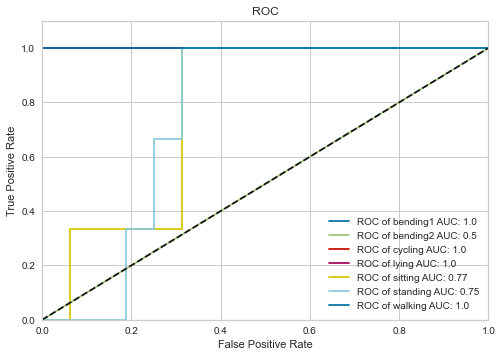

In [66]:
one_hot_y = []
for i in range(len(multi_L1_test_Y)):
    row = [0] * 7
    row[multi_L1_test_Y[i]] = 1
    one_hot_y.append(row)

one_hot_y_df = pd.DataFrame(one_hot_y, columns= dir_names)
pred_prob_y = pred_prob_df

fpr = {}
tpr = {}
multiclass_AUC = {}
for i in range(len(dir_names)):
    fpr[i], tpr[i], _ = roc_curve(one_hot_y_df[dir_names[i]], pred_prob_y[dir_names[i]])
    multiclass_AUC[i] = round(auc(fpr[i], tpr[i]), 2)

for i in range(0, 7):
    class_name = dir_names[i]
    label = 'ROC of ' + class_name + ' AUC: ' + str(multiclass_AUC[i])
    plt.plot(fpr[i], tpr[i], label=label)

print('TEST ROC ON MULTICLASS L1 PENALISED LOGISTIC REGRESSION:')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend()
plt.show()

In [91]:
print('TEST CONFUSION MATRIX FOR MULTICLASS L1 PENALISED LOGISTIC REGRESSION:')
cnf = confusion_matrix(multi_L1_test_Y, predictions)
cnf_df = pd.DataFrame(cnf, index= dir_names, columns= dir_names)
cnf_df

TEST CONFUSION MATRIX FOR MULTICLASS L1 PENALISED LOGISTIC REGRESSION:


,bending1,bending2,cycling,lying,sitting,standing,walking
bending1,2,0,0,0,0,0,0
bending2,1,0,0,0,1,0,0
cycling,0,0,3,0,0,0,0
lying,0,0,0,3,0,0,0
sitting,0,0,0,0,1,2,0
standing,0,0,0,0,1,2,0
walking,0,0,0,0,0,0,3


**4. (c)(ii) Repeat 4(c)i using a Naive Bayes classifier. Use both Gaussian and Multinomial priors and compare the results.**

**Gaussian Bayes**

In [70]:
features_to_select = [1,2,3,4,5,6]
parameters = ['Median', 'Mean', 'Std']
start_L = 1
end_L = 20

gauss_train_dict = {}
gauss_data = []

for L in range(start_L, end_L+1):
    gauss_data_temp = []
    feature_to_plot = []
    
    for k,v in train_data.items():
        activity = k.split('/')[0]
        count = 1
        splits = np.array_split(v,L)
        row = []
        for split in splits:
            stats = getStats(split)
            for param in parameters:
                feature_stat = stats[param]
                for j in range(0,6):
                    if len(feature_to_plot) < len(parameters) * len(features_to_select) * L:
                        feature_to_plot.append(param + '_' + columns[j] + '_split_' + str(count))
                    row.append(feature_stat[j])
            count += 1
        
        index = dir_names.index(activity)
        row.append(index)

        gauss_data_temp.append(row)
    
    feature_to_plot.append('activity')
    gauss_train_df = pd.DataFrame(gauss_data_temp, columns= feature_to_plot)

    strat_K_fold = StratifiedKFold(n_splits= 5, shuffle= False)
    accuracy = []
    for train_index, val_index in strat_K_fold.split(gauss_train_df[feature_to_plot],
                                                     gauss_train_df['activity']):
        # get train data for model
        train_X, train_Y = getTrainData(gauss_train_df, feature_to_plot, train_index)
        
        # get cross validation data for model
        val_X, val_Y = getCrossValData(gauss_train_df, feature_to_plot, val_index)
        
        # Fit gaussian naive bayes classifier
        gauss_model = GaussianNB()
        gauss_model = gauss_model.fit(train_X, train_Y)       
        
        # Cross-validation accuracy
        gauss_acc = gauss_model.score(val_X, val_Y)
        
        accuracy.append(gauss_acc)
        
    temp = []
    temp.append(L)
    temp.append(np.mean(accuracy))
    
    gauss_data.append(temp)
    gauss_train_dict[L] = gauss_train_df

In [72]:
gauss_output = pd.DataFrame(gauss_data, columns= ['L','Train Accuracy'])
gauss_output

,L,Train Accuracy
0,1,0.868132
1,2,0.826374
2,3,0.738462
3,4,0.753846
4,5,0.782418
5,6,0.765934
6,7,0.737363
7,8,0.723077
8,9,0.796703
9,10,0.796703


In [74]:
g_accs = gauss_output.iloc[:,1]

best_index = g_accs.argmax()

gauss_best_L = gauss_output.iloc[best_index, 0]
gauss_best_accuracy = gauss_output.iloc[best_index, 1]

print('******************')
print('BEST L BASED ON ACCURACY: ', gauss_best_L)
print('******************')

print('BEST ACCURACY: ', gauss_best_accuracy)

******************
BEST L BASED ON ACCURACY:  1
******************
BEST ACCURACY:  0.868131868131868


In [78]:
gauss_train_XY = gauss_train_dict[gauss_best_L]
gauss_train_Y = pd.DataFrame(gauss_train_XY['activity'])

gauss_train_X = gauss_train_XY.drop('activity', axis= 1)

gauss_model = GaussianNB()
gauss_model = gauss_model.fit(gauss_train_X, gauss_train_Y)

gauss_train_acc = gauss_model.score(gauss_train_X, gauss_train_Y)

print('******************')
print('TRAIN ACCURACY: ')
print(gauss_train_acc)
print('******************')

******************
TRAIN ACCURACY: 
0.9565217391304348
******************


In [79]:
features_to_select = [1,2,3,4,5,6]
parameters = ['Median', 'Mean', 'Std']

gauss_test_data_temp = []
feature_to_plot = []

for k,v in test_data.items():
    activity = k.split('/')[0]
    count = 1
    splits = np.array_split(v, gauss_best_L)
    row = []
    for split in splits:
        stats = getStats(split)
        for param in parameters:
            feature_stat = stats[param]
            for j in range(0,6):
                if len(feature_to_plot) < len(parameters) * len(features_to_select) * gauss_best_L:
                    feature_to_plot.append(param + '_' + columns[j] + '_split_' + str(count))
                row.append(feature_stat[j])
        count += 1

    index = dir_names.index(activity)
    row.append(index)
    gauss_test_data_temp.append(row)
    
feature_to_plot.append('activity')
gauss_test_df = pd.DataFrame(gauss_test_data_temp, columns= feature_to_plot)

In [80]:
gauss_test_df_XY = pd.DataFrame(gauss_test_df, columns= feature_to_plot)
gauss_test_Y = pd.DataFrame(gauss_test_df_XY['activity'])

gauss_test_X = gauss_test_df_XY.drop('activity', axis= 1)

gauss_test_acc = gauss_model.score(gauss_test_X, gauss_test_Y)

print('******************')
print('TEST ACCURACY: ')
print(gauss_test_acc)
print('******************')

******************
TEST ACCURACY: 
0.8421052631578947
******************


In [96]:
gauss_pred_y = gauss_model.predict(gauss_test_X)

gauss_test_y_class= []
for i in range(len(gauss_test_Y)):
    for j in range(len(dir_names)):
        if gauss_test_Y[i][j] == 1:
            gauss_test_y_class.append(j)
            break

print('TRAIN CONFUSION MATRIX: ')
cnf = confusion_matrix(gauss_test_y_class, gauss_pred_y)
cnf_df = pd.DataFrame(cnf, index= dir_names, columns= dir_names)
cnf_df

TRAIN CONFUSION MATRIX: 


,bending1,bending2,cycling,lying,sitting,standing,walking
bending1,2,0,0,0,0,0,0
bending2,0,1,0,0,1,0,0
cycling,0,0,3,0,0,0,0
lying,0,0,0,3,0,0,0
sitting,0,0,0,0,3,0,0
standing,0,0,0,0,2,1,0
walking,0,0,0,0,0,0,3


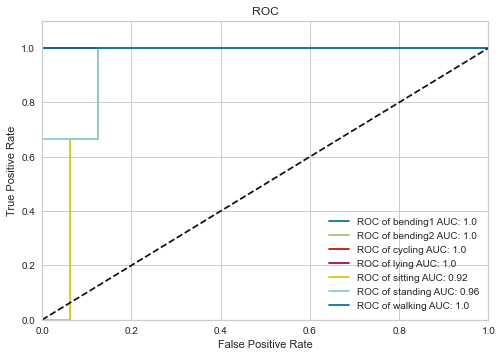

In [84]:
label_b = preprocessing.LabelBinarizer()

label_b.fit(gauss_train_Y)
gauss_train_Y = label_b.transform(gauss_train_Y)
gauss_test_Y = label_b.transform(gauss_test_Y)

pred_prob_y = gauss_model.predict_proba(gauss_test_X)

fpr = {}
tpr = {}
gauss_roc_auc = {}

for i in range(0, 7):
    fpr[i], tpr[i], _ = roc_curve(gauss_test_Y[:, i], pred_prob_y[:, i])
    gauss_roc_auc[i] = round(auc(fpr[i], tpr[i]), 2)

for i in range(0, 7):
    class_name = dir_names[i]
    label = 'ROC of ' + class_name + ' AUC: ' + str(gauss_roc_auc[i])
    plt.plot(fpr[i], tpr[i], label= label)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend()
plt.show()

**Multinomial Bayes**

In [97]:
features_to_select = [1,2,3,4,5,6]
parameters = ['Median', 'Mean', 'Std']
start_L = 1
end_L = 20

mnb_train_dict = {}
mnb_data = []

for L in range(start_L, end_L+1):
    mnb_data_temp = []
    feature_to_plot = []
    
    for k,v in train_data.items():
        activity = k.split('/')[0]
        count = 1
        splits = np.array_split(v,L)
        row = []
        for split in splits:
            stats = getStats(split)
            for param in parameters:
                feature_stat = stats[param]
                for j in range(0,6):
                    if len(feature_to_plot) < len(parameters) * len(features_to_select) * L:
                        feature_to_plot.append(param + '_' + columns[j] + '_split_' + str(count))
                    row.append(feature_stat[j])
            count += 1
        
        index = dir_names.index(activity)
        row.append(index)

        mnb_data_temp.append(row)
    
    feature_to_plot.append('activity')
    mnb_data_train_df = pd.DataFrame(mnb_data_temp, columns= feature_to_plot)

    strat_K_fold = StratifiedKFold(n_splits= 5, shuffle= False)
    accuracy = []
    for train_index, val_index in strat_K_fold.split(mnb_data_train_df[feature_to_plot],
                                                     mnb_data_train_df['activity']):
        # get train data for model
        train_X, train_Y = getTrainData(mnb_data_train_df, feature_to_plot, train_index)
        
        # get cross validation data for model
        val_X, val_Y = getCrossValData(mnb_data_train_df, feature_to_plot, val_index)
        
        # Fit gaussian naive bayes classifier
        mnb_model = MultinomialNB()
        mnb_model = mnb_model.fit(train_X, train_Y)       
        
        # Cross-validation accuracy
        mnb_acc = mnb_model.score(val_X, val_Y)
        
        accuracy.append(mnb_acc)
        
    temp = []
    temp.append(L)
    temp.append(np.mean(accuracy))
    
    mnb_data.append(temp)
    mnb_train_dict[L] = mnb_data_train_df

In [98]:
mnb_output = pd.DataFrame(mnb_data, columns= ['L','Train Accuracy'])
mnb_output

,L,Train Accuracy
0,1,0.797802
1,2,0.797802
2,3,0.782418
3,4,0.796703
4,5,0.783516
5,6,0.783516
6,7,0.783516
7,8,0.782418
8,9,0.768132
9,10,0.753846


In [99]:
m_accs = mnb_output.iloc[:,1]

best_index = m_accs.argmax()

mnb_best_L = mnb_output.iloc[best_index, 0]
mnb_best_accuracy = mnb_output.iloc[best_index, 1]

print('******************')
print('BEST L BASED ON ACCURACY: ', mnb_best_L)
print('******************')

print('BEST ACCURACY: ', mnb_best_accuracy)

******************
BEST L BASED ON ACCURACY:  1
******************
BEST ACCURACY:  0.7978021978021979


In [100]:
mnb_train_XY = mnb_train_dict[mnb_best_L]
mnb_train_Y = pd.DataFrame(mnb_train_XY['activity'])

mnb_train_X = mnb_train_XY.drop('activity', axis= 1)

mnb_model = MultinomialNB()
mnb_model = mnb_model.fit(mnb_train_X, mnb_train_Y)

mnb_train_acc = mnb_model.score(mnb_train_X, mnb_train_Y)

print('******************')
print('TRAIN ACCURACY: ')
print(mnb_train_acc)
print('******************')

******************
TRAIN ACCURACY: 
0.927536231884058
******************


In [101]:
features_to_select = [1,2,3,4,5,6]
parameters = ['Median', 'Mean', 'Std']

mnb_test_data_temp = []
feature_to_plot = []

for k,v in test_data.items():
    activity = k.split('/')[0]
    count = 1
    splits = np.array_split(v, gauss_best_L)
    row = []
    for split in splits:
        stats = getStats(split)
        for param in parameters:
            feature_stat = stats[param]
            for j in range(0,6):
                if len(feature_to_plot) < len(parameters) * len(features_to_select) * gauss_best_L:
                    feature_to_plot.append(param + '_' + columns[j] + '_split_' + str(count))
                row.append(feature_stat[j])
        count += 1

    index = dir_names.index(activity)
    row.append(index)
    mnb_test_data_temp.append(row)
    
feature_to_plot.append('activity')
mnb_test_df = pd.DataFrame(mnb_test_data_temp, columns= feature_to_plot)

In [102]:
mnb_test_df_XY = pd.DataFrame(mnb_test_df, columns= feature_to_plot)
mnb_test_Y = pd.DataFrame(mnb_test_df_XY['activity'])

mnb_test_X = mnb_test_df_XY.drop('activity', axis= 1)

mnb_test_acc = mnb_model.score(mnb_test_X, mnb_test_Y)

print('******************')
print('TEST ACCURACY: ')
print(mnb_test_acc)
print('******************')

******************
TEST ACCURACY: 
0.8421052631578947
******************


In [107]:
mnb_pred_y = mnb_model.predict(mnb_test_X)

print('TRAIN CONFUSION MATRIX: ')
cnf = confusion_matrix(mnb_test_Y, mnb_pred_y)
cnf_df = pd.DataFrame(cnf, index= dir_names, columns= dir_names)
cnf_df

TRAIN CONFUSION MATRIX: 


,bending1,bending2,cycling,lying,sitting,standing,walking
bending1,2,0,0,0,0,0,0
bending2,1,1,0,0,0,0,0
cycling,0,0,3,0,0,0,0
lying,0,0,0,3,0,0,0
sitting,0,0,0,0,2,1,0
standing,0,0,0,1,0,2,0
walking,0,0,0,0,0,0,3


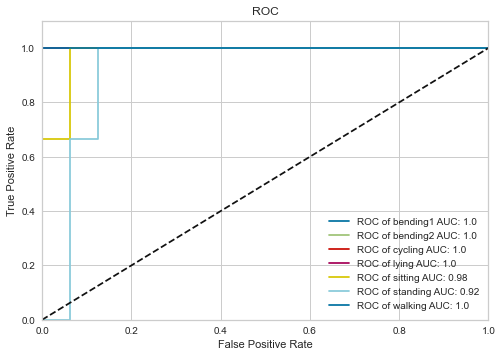

In [108]:
label_b = preprocessing.LabelBinarizer()

label_b.fit(mnb_train_Y)
mnb_train_Y = label_b.transform(mnb_train_Y)
mnb_test_Y = label_b.transform(mnb_test_Y)

pred_prob_y = mnb_model.predict_proba(mnb_test_X)

fpr = {}
tpr = {}
mnb_roc_auc = {}

for i in range(0, 7):
    fpr[i], tpr[i], _ = roc_curve(mnb_test_Y[:, i], pred_prob_y[:, i])
    mnb_roc_auc[i] = round(auc(fpr[i], tpr[i]), 2)

for i in range(0, 7):
    class_name = dir_names[i]
    label = 'ROC of ' + class_name + ' AUC: ' + str(mnb_roc_auc[i])
    plt.plot(fpr[i], tpr[i], label= label)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend()
plt.show()

**4. (c)(iii) Which method is better for multi-class classification in this problem**

In [109]:

comp_data = []

temp1 = []
temp1.append('Training Accuracy')
temp1.append(multi_L1_train_acc)
temp1.append(gauss_train_acc)
temp1.append(mnb_train_acc)
comp_data.append(temp1)

temp2 = []
temp2.append('Testing Accuracy')
temp2.append(multi_L1_test_acc)
temp2.append(gauss_test_acc)
temp2.append(mnb_test_acc)
comp_data.append(temp2)

for i in range(0, 7):
    temp = []
    temp.append(dir_names[i] + ' AUC')
    temp.append(multiclass_AUC[i])
    temp.append(gauss_roc_auc[i])
    temp.append(mnb_roc_auc[i])
    comp_data.append(temp)
    
final_comp = pd.DataFrame(comp_data, columns= ['Eval Parameter', 'Multiclass Logistic Regression',
                                               'Gaussian Naive Bayes', 'Multinomial Naive Bayes'])
final_comp

,Eval Parameter,Multiclass Logistic Regression,Gaussian Naive Bayes,Multinomial Naive Bayes
0,Training Accuracy,1.000,0.956522,0.927536
1,Testing Accuracy,0.737,0.842105,0.842105
2,bending1 AUC,1.000,1.000000,1.000000
3,bending2 AUC,0.500,1.000000,1.000000
4,cycling AUC,1.000,1.000000,1.000000
5,lying AUC,1.000,1.000000,1.000000
6,sitting AUC,0.770,0.920000,0.980000
7,standing AUC,0.750,0.960000,0.920000
8,walking AUC,1.000,1.000000,1.000000


**Clearly from above table, we can see that Multinomial Bayes Classifer performs better than Gaussain and Multiclass LR classifiers since AUC for each class is better**